# <font color=brown>Projet 6</font>

![](logo.png)

## Analyses exploratoires et descriptives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_predict
from pmdarima import auto_arima
import pmdarima as pm
import warnings
warnings.simplefilter("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importation des fichiers

In [2]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

### Fonction

Ici je vais mettre en place une fonction qui peut me sortir les grandes étapes pour faire une analyse exploratoire des données. En effet, c'est une partie qui est assez redondante.

Les caractéristiques à mettre en place pour chaque fichier sont:
- Aperçu du dataset 
- Informations générales du dataset 
- Aperçu des valeurs manquantes 
- Aperçu des valeurs uniques et des doublons 
- Analyse statistique du dataset 



In [3]:
def analyses_exploratoire(dataset):
    """ fait passer le dataframe pour avoir les 5 caractéristiques qui sont: 
    un sample()
    un info()
    un describe()
    un isna.sum()
    un nunique()
    un duplicated().sum()
    
    Args:
    string (str): Type dataframe

    Return:
    le résultat des 6 caractéristiques

    Exemples:
    >>>analyse_exploratoire(customers)
    ---------------------------------------
    Aperçu de la table :
    
        client_id sex birth
    218 c_7795    m   2003
    900 c_1573    f   1992...
    ---------------------------------------
    Description statistique :

    birth
    count  8623.000000
    mean   1978.280877...
    ---------------------------------------
    Information sur le fichier :

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 8623 entries, 0 to 8622
    Data columns (total 3 columns):
    #   Column     Non-Null Count  Dtype 
    ---  ------     --------------  ----- 
    0   client_id  8623 non-null   object...
    -----------------------------------------
    Aperçu des valeurs uniques 
    client_id    8623
    sex             2
    birth          76
    dtype: int64 ....
    -----------------------------------------
    Aperçu des doublons
    0
    -----------------------------------------
    Aperçu des valeurs manquantes
    client_id    0
    sex          0
    birth        0
    dtype: int64
     
    """
    print("Aperçu de la table:")
    resultat= display(dataset.sample(5))
    print("------------------------------------------------")
    print("Information sur le fichier:")
    resultat= dataset.info()
    print("------------------------------------------------")
    print("Aperçu des valeurs uniques:")
    resultat= display(dataset.nunique()) 
    print("-----------------------------------------------")
    print("Aperçu des doublons:")
    resultat= display(dataset.duplicated().sum())
    print("-----------------------------------------------")
    print("Aperçu des valeurs manquantes:")
    resultat= display(dataset.isna().sum()) 
    print("------------------------------------------------")
    print("Description statistique des données du fichier:")
    resultat= display(dataset.describe(include= "all"))
    
    
    return resultat

###  Fichier Customers

In [4]:
analyses_exploratoire(customers)

Aperçu de la table:


,client_id,sex,birth
3570,c_373,m,2002
7377,c_1879,f,1973
8013,c_798,m,1985
7365,c_8268,m,1998
2328,c_3112,m,1968


------------------------------------------------
Information sur le fichier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
------------------------------------------------
Aperçu des valeurs uniques:


client_id    8623
sex             2
birth          76
dtype: int64

-----------------------------------------------
Aperçu des doublons:


0

-----------------------------------------------
Aperçu des valeurs manquantes:


client_id    0
sex          0
birth        0
dtype: int64

------------------------------------------------
Description statistique des données du fichier:


,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
customers.groupby(by='sex').describe()

birth                                                                
      count         mean        std     min     25%     50%     75%     max
sex                                                                        
f    4491.0  1977.994879  17.098242  1929.0  1966.0  1979.0  1992.0  2004.0
m    4132.0  1978.591723  16.719656  1929.0  1966.0  1980.0  1992.0  2004.0

D'après ces résultats, nous constatons qu'il y a 2 catégories d'individus: Homme et Femme. 

Les années de naissance pour chacune des catégories est entre 1929 et 2004. Par contre, il serait plus intéressant de parler de l'âge d'un individu que de sa date de naissance donc on va créer une nouvelle colonne qui indique l'âge, et par la même occasion, nous allons crééer une catégorie d'âge.

Les données semblent être de qualités. Il n'y a pas de valeurs manquantes ni de doublons. 


#### Traitements et nettoyage des données

In [6]:
# rajout d'une colonne âge
# année actuelle: 2022
customers["age"]= 2022 - customers["birth"]
customers.sample(5)

,client_id,sex,birth,age
2793,c_4010,m,1977,45
4050,c_3753,m,2000,22
7973,c_4500,f,1978,44
1233,c_442,f,2004,18
1507,c_1043,f,1977,45


In [7]:
# Création d'une catégorie d'âge, je vais diviser en 4 catégories
pd.qcut(customers['age'], 4).value_counts() #qcut divise l'ensemble en quantité plus homogène dans chaque catégorie


(17.999, 30.0]    2282
(30.0, 43.0]      2221
(43.0, 56.0]      2066
(56.0, 93.0]      2054
Name: age, dtype: int64

Nous avons maintenant une taille iso effectif.

In [8]:
bins= [0,30,43,56,100]
labels = ['-30','30-43','44-56','+56']
customers['age_category'] = pd.cut(customers['age'], bins, labels=labels)
customers.sample(5)
customers.info()

,client_id,sex,birth,age,age_category
5499,c_1377,m,1986,36,30-43
7972,c_4643,f,1964,58,+56
1877,c_5268,m,1955,67,+56
5646,c_227,f,1998,24,-30
3349,c_8343,f,1989,33,30-43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   client_id     8623 non-null   object  
 1   sex           8623 non-null   object  
 2   birth         8623 non-null   int64   
 3   age           8623 non-null   int64   
 4   age_category  8623 non-null   category
dtypes: category(1), int64(2), object(2)
memory usage: 278.2+ KB


##### <font color='blue'>Graphes</font>

Pour avoir une meilleure aperçue des données, je vais les représenter graphiquement:
- Je vais faire une distribution selon l'âge et les catégories d'âge
- Puis une distribution selon le genre

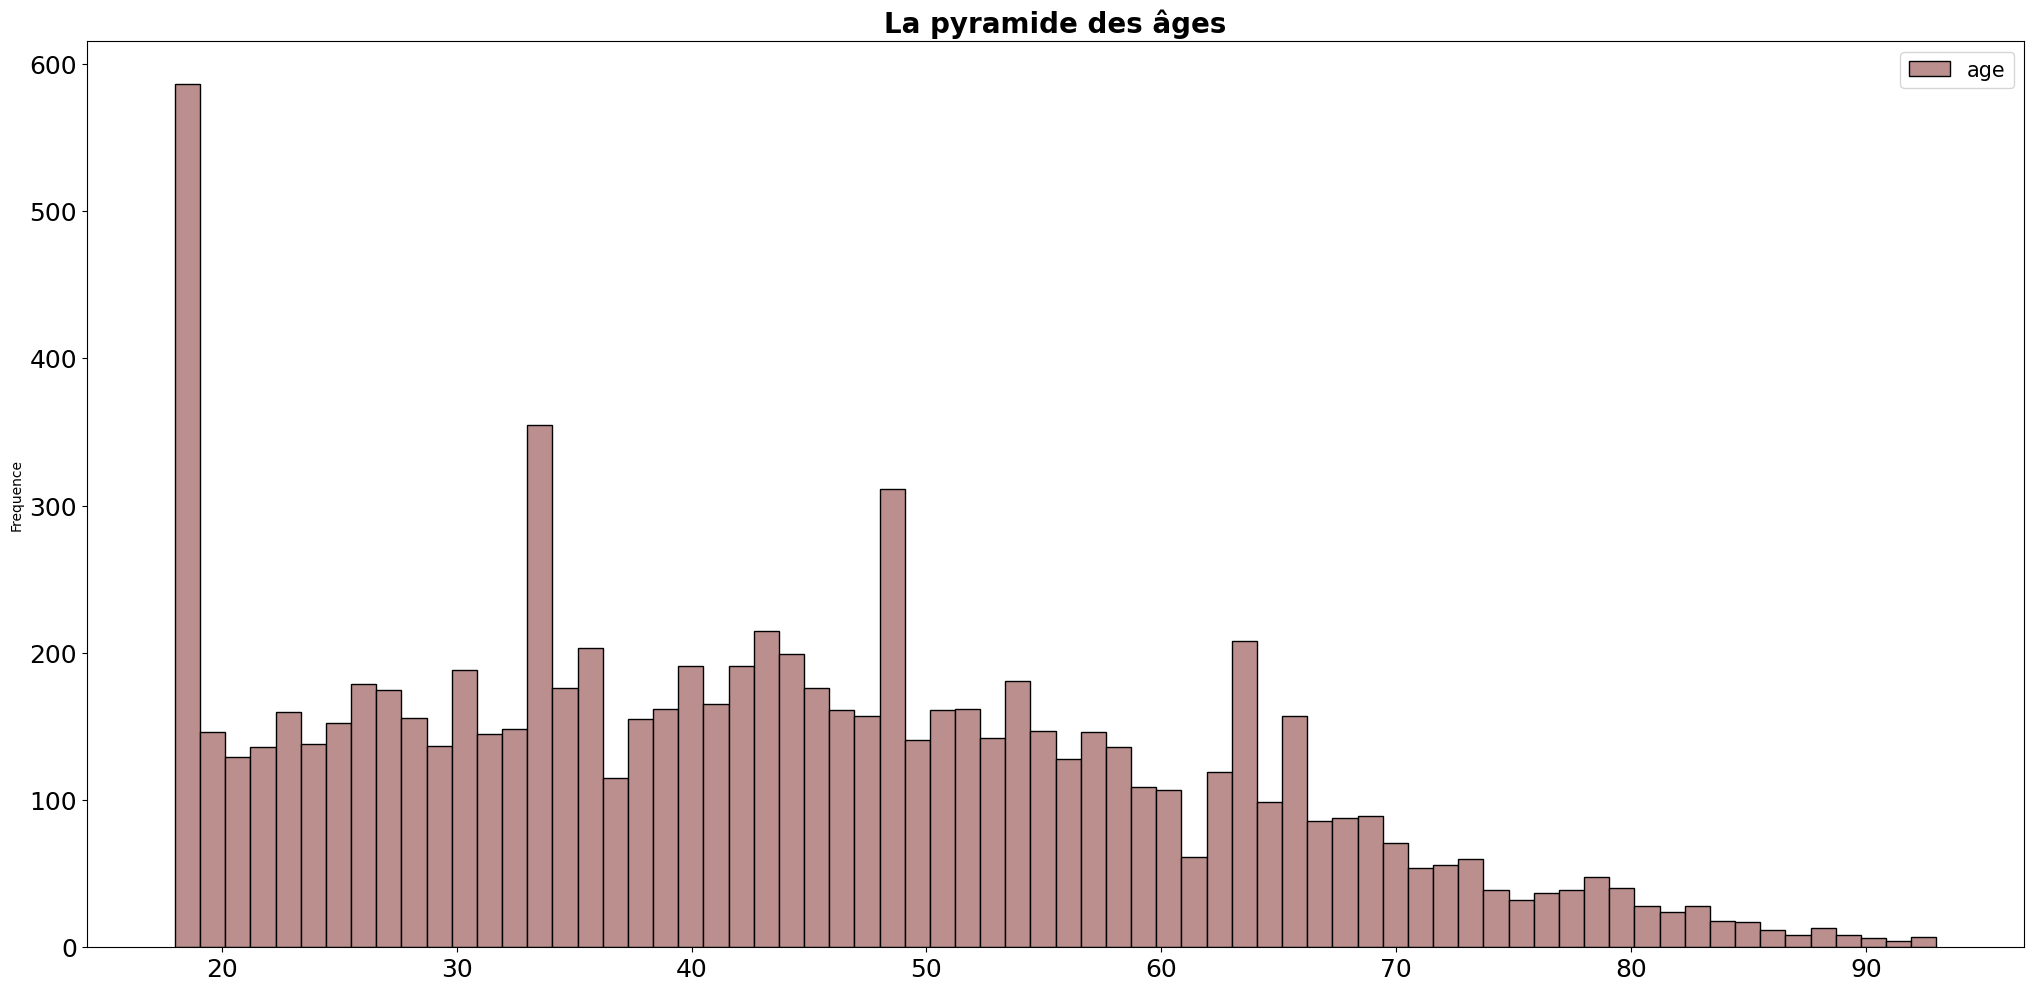

In [9]:
fig, ax = plt.subplots(figsize=(25,12), dpi=100)


ax.hist(customers['age'], bins=70, edgecolor='black', color="rosybrown") 

ax.legend(["age"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence')

ax.set_title("La pyramide des âges",  fontsize=20,fontweight="bold");

Sur ce graphique, nous avons un histogramme relativement symétrique mais avec quelques valeurs aberrantes. Il y a en effet quelques pics dont un qui est énorme à 18 ans. Je suppose que celà doit inclure les personnes mineurs qui n'ont accès au site que s'ils mettent qu'ils ont 18 ans.  

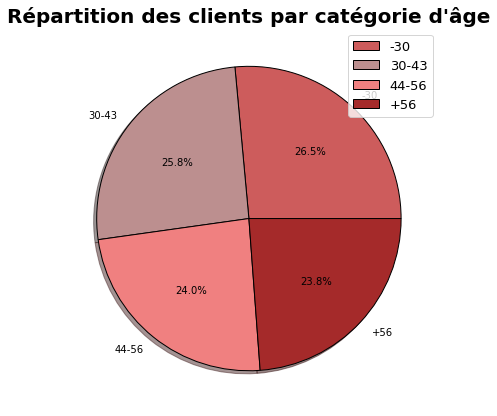

In [10]:
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(customers["age_category"].value_counts(normalize=True),
       labels=['-30','30-43','44-56','+56'],
       shadow=True,
       autopct="%1.1f%%", 
       wedgeprops={"edgecolor":"black"},
       colors= ["indianred", "rosybrown","lightcoral","brown"])
      

ax.legend(prop={'size':13})
ax.set_title("Répartition des clients par catégorie d'âge",  fontsize=20,fontweight="bold");

Avec ce graphique, on voit une répartition assez homogène des catégories d'âge

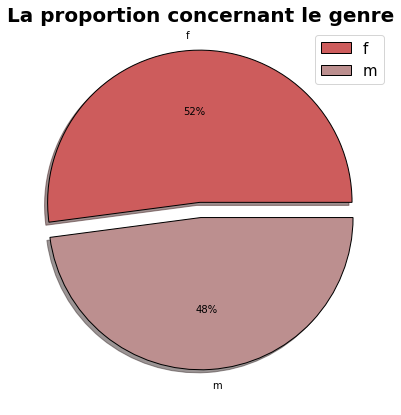

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(customers["sex"].value_counts(normalize=True),
       labels=["f","m"],
       shadow=True,
       autopct="%0.0f%%", 
       wedgeprops={"edgecolor":"black"}, 
       explode= [0.1,0],
       colors= ["indianred", "rosybrown"]) 

ax.legend(prop={'size':15})
ax.set_title("La proportion concernant le genre",  fontsize=20,fontweight="bold");


Sur ce graphique, on voit qu'on a un peu plus de femmes que l'hommes dans les données

###  Fichier Products

In [12]:
analyses_exploratoire(products)

Aperçu de la table:


,id_prod,price,categ
605,0_444,10.17,0
2170,0_1347,5.99,0
1011,2_150,157.63,2
2303,1_156,32.67,1
3070,1_327,38.99,1


------------------------------------------------
Information sur le fichier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
------------------------------------------------
Aperçu des valeurs uniques:


id_prod    3287
price      1455
categ         3
dtype: int64

-----------------------------------------------
Aperçu des doublons:


0

-----------------------------------------------
Aperçu des valeurs manquantes:


id_prod    0
price      0
categ      0
dtype: int64

------------------------------------------------
Description statistique des données du fichier:


,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [13]:
products.groupby(by='categ').describe()

price                                                              
        count        mean        std    min     25%     50%     75%     max
categ                                                                      
0      2309.0   11.727280   7.568756  -1.00   5.580   10.32   16.65   40.99
1       739.0   25.531421  15.425162   2.00  13.390   22.99   33.99   80.99
2       239.0  108.354686  49.561431  30.99  71.065  101.99  136.53  300.00

A première vue, nous constatons qu'il n'y a pas de valeurs nulles, ni de doublons. Le dataset semble être qualitatif.
Je vais juste changer le type de catégorie qui doit être de type catégorie ou objet.

Nous pouvons également constater qu'il y a 3 catégories, qui passent de 0 à 3, et que les prix augmentent en fonction des catégories. C'est-à-dire la catégorie 0 regroupe les touts petits prix et la catégorie 3 regroupent les prix les plus élevés.

Le prix minimum d'un livre, qui se trouve dans la catégorie 0, est de -1€. Nous allons voir cela en détail plus tard, puisque celà semble étrange. Le prix maximum est de 300€, qui se trouve dans la catégorie 2, et le prix moyen est de 21.86€.

Il y a 3287 produits différents et 1455 prix différents dans les 3 catégories. 



#### Traitements et nettoyage des données

In [14]:
#changer type "categ"
products["categ"] = products["categ"].astype("str")
products.dtypes

id_prod     object
price      float64
categ       object
dtype: object

In [15]:
#zoom sur les prix négatifs dont (-1)
products[products["price"] < 0]


,id_prod,price,categ
731,T_0,-1.0,0


- D'après ce résultat, nous n'avons qu'une seule ligne dont le prix est à -1.

- Pour ma part, je vais le supprimer puisque celà ressemble à une anomalie. On peut trouver des ebooks à moins de 1€ par exemple mais on ne trouve pas des livres à prix négatifs.

In [16]:
# supprimer la ligne avec un prix à -1€
products=products[products["price"] != -1]
products.shape

(3286, 3)

- Maintenant, on voit que nous n'avons plus que 3286 lignes, contre 3287 initialement.

##### <font color='blue'>Graphes</font>

Pour avoir une meilleure aperçue des données, je vais faire une distribution:
- concernant le prix
- et selon les catégories

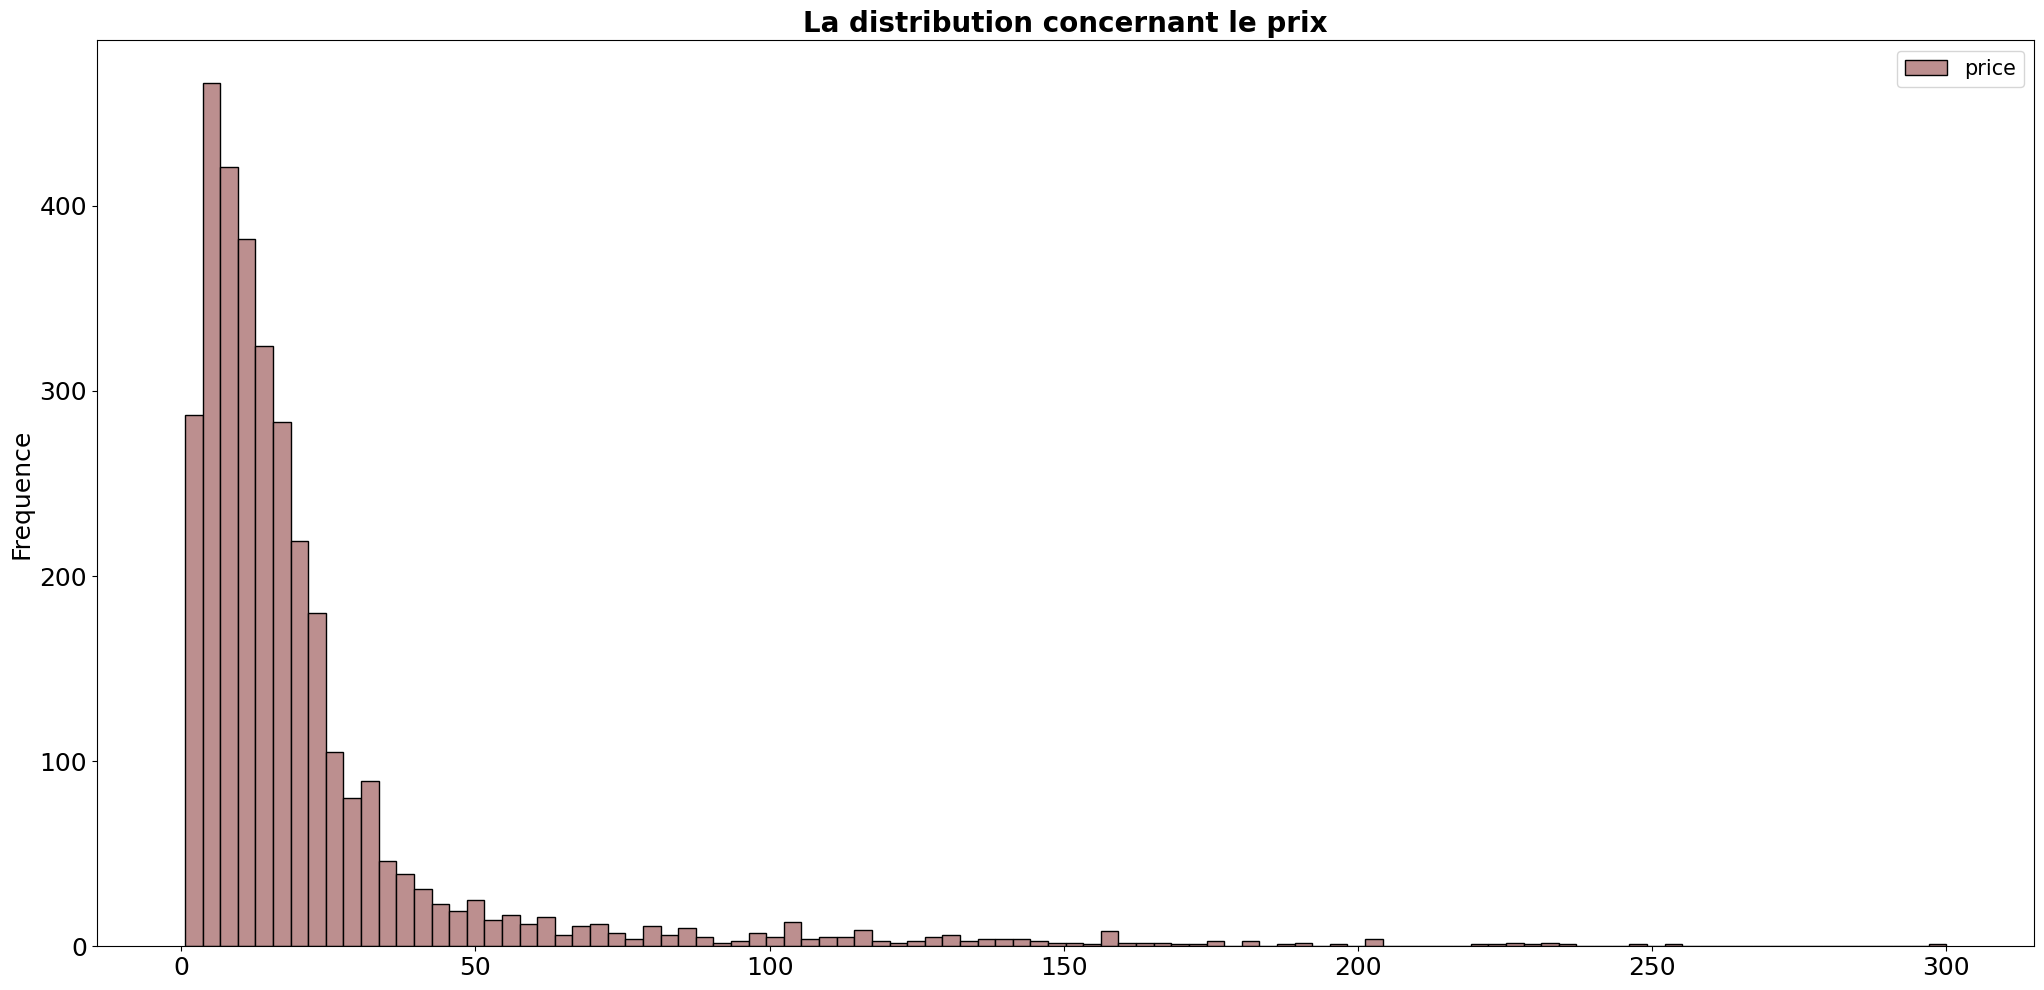

In [17]:
fig, ax = plt.subplots(figsize=(25,12), dpi=100)

ax.hist(products['price'], bins=100, edgecolor='black',color="rosybrown")  

ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence', fontsize = 18)

ax.set_title("La distribution concernant le prix",  fontsize=20,fontweight="bold");

Ce graphique nous montre un histogramme univarié avec une distribution asymétrique et un coefficient de kurtosis élevée qui se traduit par un pic très net et une longue queue.


Pour traduire, la répartition des prix est plutot tirée par les prix bas. On remarque en effet que la majorité des produits coutent moins de 50€. Et la longueur de la queue nous montre qu'il y a quelques produits assez chers qui coutent même 300€

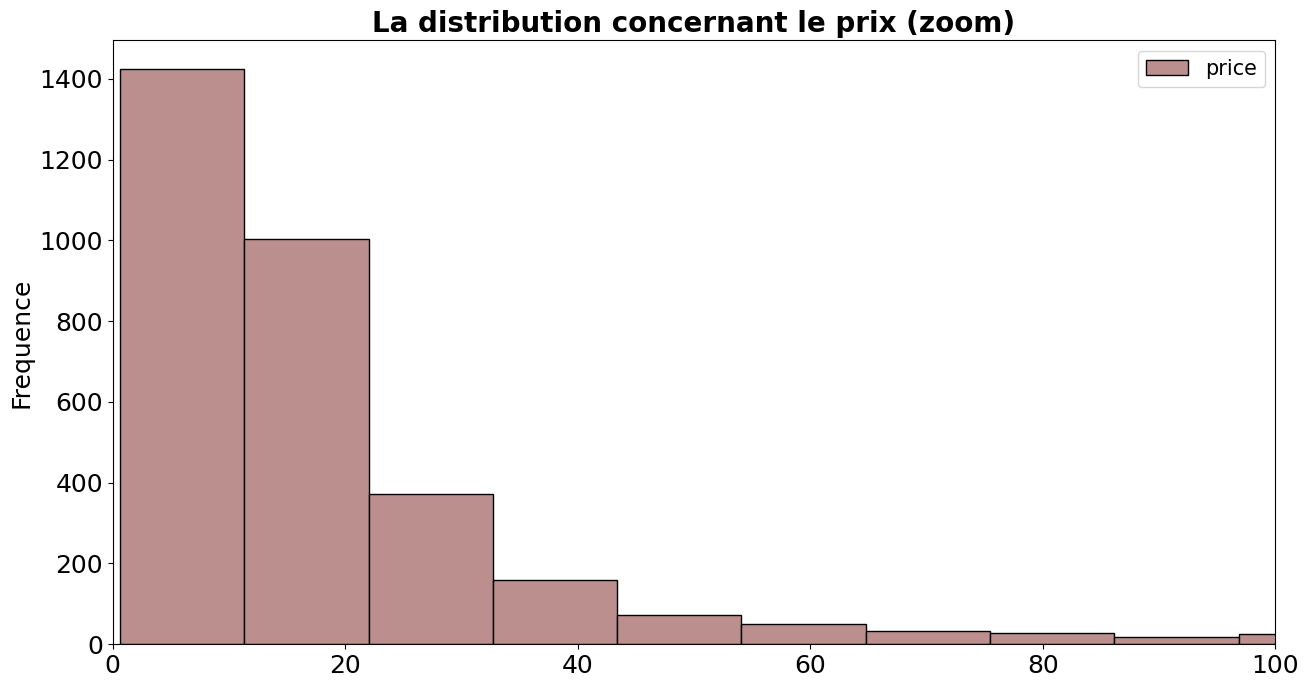

In [18]:
#si je fais un zoom pour me concentrer plus vers là où les données sont concentrées
fig, ax = plt.subplots(figsize=(15,8), dpi=100)


ax.hist(products['price'], bins=28, edgecolor="black", color="rosybrown")  # c'est la taille recommendé avec la méthode struges (1 + 3.33 * np.log(3287))
ax.set_xlim(0,100) 
ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence', fontsize = 18)

ax.set_title("La distribution concernant le prix (zoom)",  fontsize=20,fontweight="bold");

En faisant un zoom sur là où les données sont plus concentrées, on peut dire que la majorité des livres coutent moins de 20€.

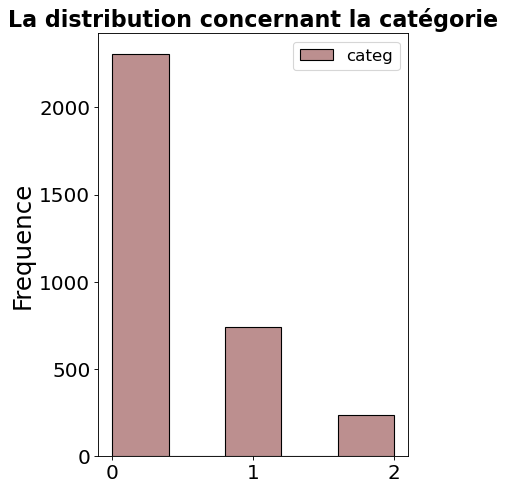

In [19]:
#Analyse univarié
fig, ax = plt.subplots(figsize=(5,7), dpi=80)


ax.hist(products['categ'], bins=5, edgecolor= 'black', color="rosybrown") 

ax.legend(["categ"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence', fontsize = 22)

ax.set_title("La distribution concernant la catégorie",  fontsize=20,fontweight="bold");

Ce graphique nous indique que la majorité des données se trouvent dans la catégorie 0, suivi par la catégorie 1, puis la catégorie 2.

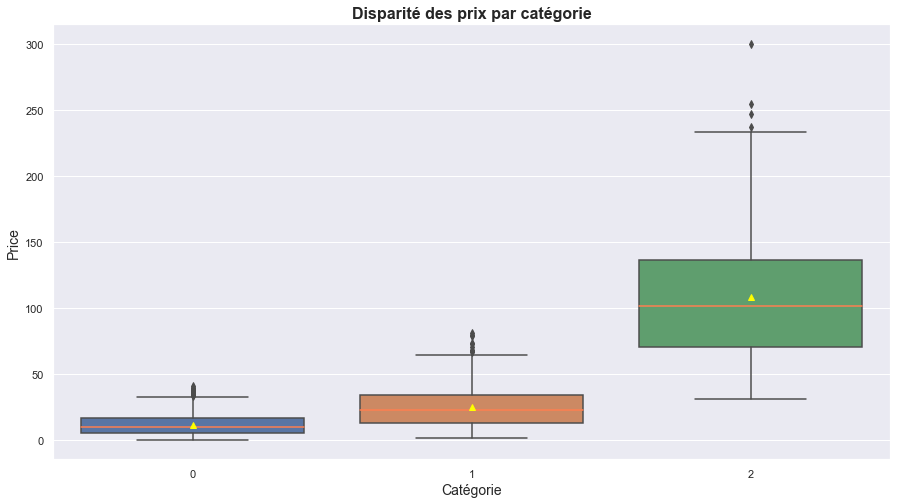

In [20]:
# Analyse bivarié
sns.set(rc={"figure.figsize":(15, 8)})
sns.boxplot(data = products,
            y = 'price',
            x = 'categ',
            medianprops={"color": "coral"}, showmeans=True,
           meanprops = {'markeredgecolor':'yellow',
            'markerfacecolor':'yellow'})
plt.title("Disparité des prix par catégorie",fontsize=16,fontweight='bold')
plt.ylabel("Price",fontsize=14)
plt.xlabel ('Catégorie', fontsize=14); 

Ce graphique nous indique que les prix des livres par catégorie sont très différents. Les prix des livres de la catégorie 2 sont beaucoup plus élevés et étendus que ceux des catégories 0 et 1. 

Et par la même occasion, nous remarquons qu'il y a quelques outliers concernant les prix de chacune des catégories, mais nous n'allons pas approfondir cette partie dans ce projet. Nous allons garder toutes les valeurs en considérant que tous les prix indiqués sont des valeurs possibles pour l'achat d'un livre. 

### Fichier transactions

In [21]:
analyses_exploratoire(transactions)

Aperçu de la table:


,id_prod,date,session_id,client_id
560842,0_1322,2021-10-09 14:28:09.697743,s_102303,c_3239
46606,1_281,2022-04-04 04:03:54.794198,s_188982,c_3886
672164,0_1356,2022-06-27 16:52:51.004050,s_230110,c_6714
282295,0_1573,2022-04-04 21:47:27.849551,s_189301,c_2538
93528,0_1356,2021-12-16 14:35:04.056686,s_135265,c_1799


------------------------------------------------
Information sur le fichier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
------------------------------------------------
Aperçu des valeurs uniques:


id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

-----------------------------------------------
Aperçu des doublons:


126

-----------------------------------------------
Aperçu des valeurs manquantes:


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

------------------------------------------------
Description statistique des données du fichier:


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


D'après ces résultats, on constate qu'il n'y a pas de valeurs nulles dans les données.

Par contre, il y a des doublons. Les dates sont en objet, ce qui n'est pas souhaitable.

Et enfin dans la partie description, on peut voir que la date qui se répète le plus est: `test_2021-03-01 02:30:02.237413`, ce format `test`est étrange mais nous allons voir tout ceci en détail dans la partie nettoyage des données

#### Traitements et nettoyage des données

##### Erreurs types

En utilisant la méthode `pd.to_datetime`, je rencontre une erreur avec l'élément ci-après: `Unknown string format: test_2021-03-01 02:30:02.237419"`, qui m'empêche de changer le type des dates.

Je vais faire un zoom sur ce problème pour voir ce qu'il faut faire avec.

In [22]:
transactions[transactions.date.str.contains('test')].head(5)
transactions[transactions['id_prod'] == 'T_0'].head(5)

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


Ici on voit que tous ces tests correspondent au `T_0` du id_prod pour des sessions `s_0`, et pour des clients "fictifs" `ct_0` et `ct_1`.

Ces tests ne seront pas utiles pour notre analyse, puisque ce sont des données fictives, donc je préfère les supprimer.

In [23]:
# supprimer les id_prod à T_0
transactions=transactions[transactions['id_prod'] != 'T_0']
transactions.shape

(679332, 4)

- Sur cette ligne, nous pouvons voir que maintenant, nous n'avons plus que 679332 lignes sur les 679532 initialement.

##### Changement format

In [24]:
transactions['date_2'] = pd.to_datetime(transactions['date'])
transactions['date_2'] = pd.to_datetime(transactions['date_2'].dt.strftime('%Y-%m-%d'))
transactions.dtypes
transactions.sample(5)

id_prod               object
date                  object
session_id            object
client_id             object
date_2        datetime64[ns]
dtype: object

,id_prod,date,session_id,client_id,date_2
181800,2_102,2021-04-10 04:02:06.319421,s_18467,c_7582,2021-04-10
516558,1_674,2022-02-16 14:22:51.259813,s_166107,c_3947,2022-02-16
113944,0_997,2022-11-28 13:21:49.819511,s_304072,c_7769,2022-11-28
280631,0_1519,2023-02-05 05:51:53.689409,s_337125,c_1609,2023-02-05
484208,0_1684,2021-09-07 08:55:02.645944,s_86261,c_8593,2021-09-07


##### Doublons 

In [25]:
print("Nous avons", transactions.duplicated().sum(),"valeurs dupliquées" )

Nous avons 0 valeurs dupliquées


Nous avons supprimés par la même occasion les valeurs dupliqués avec la suppression des tests ci-dessus.

##### <font color='blue'>Graphes</font>

Il serait intéressant de voir un peu la répartition par année des données, donc on va d'abord crééer quelques colonnes supplémentaires pour bien représenter graphiquement nos données.

In [26]:
transactions['year'] = transactions['date_2'].dt.strftime('%Y')
transactions['month'] = transactions['date_2'].dt.strftime('%m')
transactions['day'] = transactions['date_2'].dt.strftime('%d')
transactions.sample(5)

,id_prod,date,session_id,client_id,date_2,year,month,day
578932,0_2102,2021-10-04 07:59:15.906249,s_99787,c_5355,2021-10-04,2021,10,04
114989,0_1612,2021-05-18 17:49:45.561089,s_36266,c_5346,2021-05-18,2021,05,18
227504,0_1600,2022-05-03 20:25:58.247118,s_203171,c_6135,2022-05-03,2022,05,03
341418,1_277,2021-11-23 02:29:29.025137,s_123660,c_4958,2021-11-23,2021,11,23
61703,0_1366,2021-04-26 22:26:26.946560,s_26231,c_1072,2021-04-26,2021,04,26


Ici on va regarder la repartition des données par année puis par mois

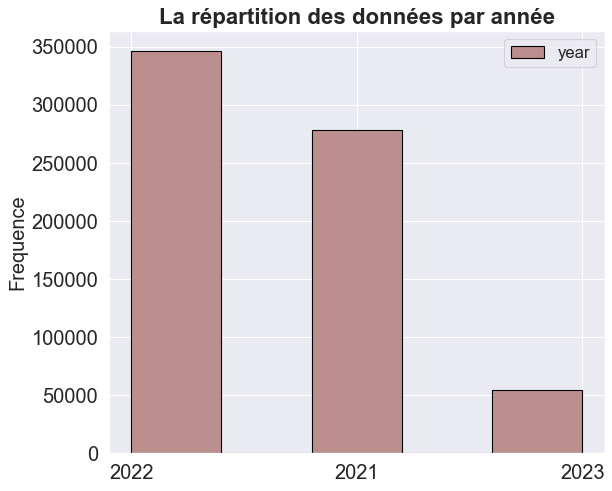

In [27]:
fig, ax = plt.subplots(figsize=(8,7), dpi=80)

ax.hist(transactions['year'], bins=5, edgecolor= "black", color='rosybrown')  

ax.legend(["year"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence', fontsize = 18)

ax.set_title("La répartition des données par année",  fontsize=20,fontweight="bold");

Sur ce graphique on remarque qu'il y a plus de données en 2022 par rapport à 2021 et 2023, puisque c'est la seule année où nous avons des données complètes.

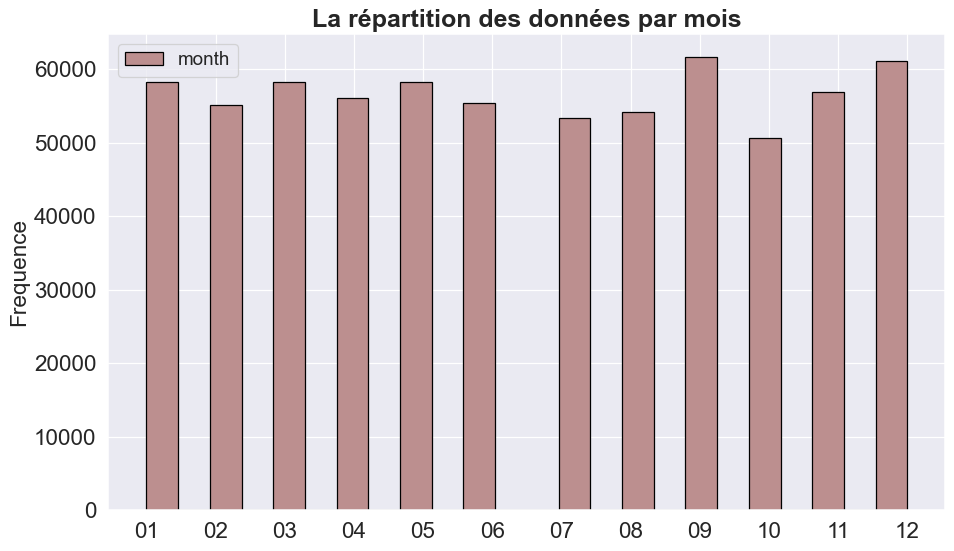

In [28]:
# trier par mois
graphe=transactions.sort_values(by=['month'], ascending=True)

fig, ax = plt.subplots(figsize=(12,7), dpi=90)

ax.hist(graphe['month'], bins=24, edgecolor="black", color="rosybrown")  

ax.legend(["month"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('Frequence', fontsize = 18)

ax.set_title("La répartition des données par mois",  fontsize=20,fontweight="bold");

Sur ce graphique, on constate que nous avons à peu près les mêmes quantités d'informations pour chaque mois, avec moins de quantités au mois d'octobre

## Jointures

Ici j'ai vérifié par une fonction les conditions de non nullité et d'unicité des clés primaires.

In [29]:

def check_key(dataset):
    """ fait passer toutes les colonnes du dataframme
    pour voir quelles sont les colonnes qui respectent les 2 conditions:
    non null et unique

    Args:
    string (str): Type dataframe

    Returns:
    liste les potentiels clés primaires

    Examples:
    >>>check_key(customers)
    ['client_id]) """

    unique_cols = []  # Création d'une liste vide pour contenir les colonnes
    for col in dataset.columns : # passe sur toutes les colonne du dataframe
        if dataset[col].is_unique  and dataset[col].isna().sum() ==0: # renvoie True si il n'y a que des valeurs uniques + pas de valeurs manquants (dont Nan est 0)
            unique_cols.append(col)   # ajoute le nom de la colonne à la liste
    return unique_cols           # renvoie la liste

In [30]:
print("La clé candidate pour le fichier Customers est:", check_key(customers))
print("")
print("Les clés candidates pour le fichier products sont:", check_key(products))
print("")
print("Les clés candidates pour le fichier transactions sont:", check_key(transactions))

La clé candidate pour le fichier Customers est: ['client_id']

Les clés candidates pour le fichier products sont: ['id_prod']

Les clés candidates pour le fichier transactions sont: ['date']


- D'après ces résultats, on remarque que `client_id` et `id_prod` ne sont pas des clés primaires dans le fichier transaction puisqu'un produit peut-être acheté par plusieurs clients et un client peut acheter plusieurs produits à la même date pour une même session d'achat. Toutefois, ils sont des clés étrangères des 2 autres, donc on peut lier les 3 tables en faisant la jointure ci-dessous.

### Jointure 1

Nous allons d'abord joindre le fichier `transactions` et `products` en premier, puis on va faire une deuxième jointure avec le fichier `customers`.

In [31]:
Jointure1=pd.merge(transactions, products, on=["id_prod"], how="outer", indicator=True)
Jointure1.sample(3)

,id_prod,date,session_id,client_id,date_2,year,month,day,price,categ,_merge
347173,1_259,2021-06-10 10:54:18.099127,s_46687,c_6312,2021-06-10,2021,06,10,10.99,1,both
555525,0_1578,2021-10-31 08:37:49.823941,s_112646,c_2524,2021-10-31,2021,10,31,17.79,0,both
519390,1_544,2022-04-14 03:04:40.573211,s_193737,c_3276,2022-04-14,2022,04,14,29.54,1,both


In [32]:
Jointure1["_merge"].value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

D'après l'analyse de cette jointure, nous constatons qu'avec le left only nous avons 221 `id_prod` qui ne sont pas dans le fichier `products` donc sans prix.
Avec le right, on a 21 `id_prod` dans le fichier `products` qui n'ont pas de correspondance avec le fichier transaction, donc qui n'ont pas été vendu.

#### Produits où il y n'y a pas de prix ni de catégorie 

In [33]:
# zoom sur ces id_prod qui n'ont pas de prix
zoom = Jointure1.loc[Jointure1["_merge"] =="left_only"]
zoom.head(5)

,id_prod,date,session_id,client_id,date_2,year,month,day,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,2022,09,23,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,2022,07,23,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,2022,12,03,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,2021,08,16,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,2022,07,16,NaN,NaN,left_only


In [34]:
zoom["id_prod"].unique().tolist()

['0_2245']

Ici on voit qu'il s'agit du `id_prod: '0_2245'` qui n'a pas de prix, ni de catégorie.
Nous allons essayer de faire une imputation pour remplacer les valeurs

#### Imputation 

En analysant les données, on remarque qu'il y a un indicateur 0, 1 ou 2 devant chaque `id_prod`, qui correspond à la catégorie. Donc pour `id_prod: '0_2245'`, la catégorie est de __0__.

- Pour choisir quel type d'imputation je vais utiliser, je vais regarder l'étendu des prix de la catégorie __0__

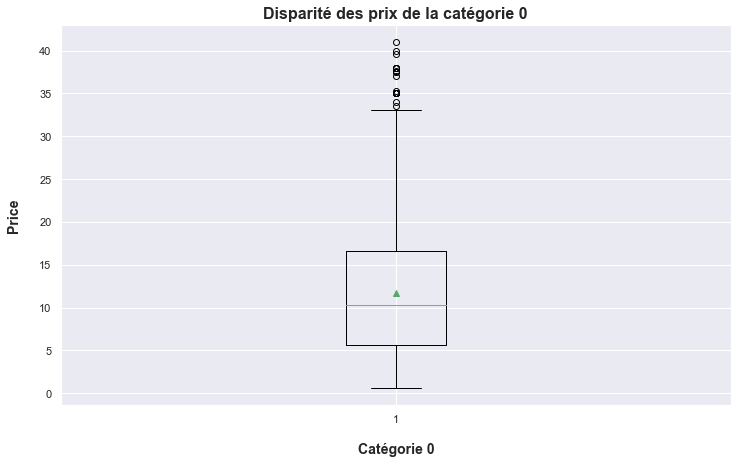

In [35]:
fig, ax = plt.subplots(figsize=(12,7))

ax.boxplot(products.price[products.categ == "0"],
           showmeans=True)
 
ax.set_title("Disparité des prix de la catégorie 0",fontsize=16,fontweight='bold')

ax.set_ylabel('Price', fontsize = 14, fontweight='bold',labelpad=18)
ax.set_xlabel('Catégorie 0',fontsize=14, fontweight='bold',labelpad=18)
plt.grid(True);

D'après ce graphique, on voit que la médiane est inférieur à la moyenne, et pour prendre en considération les prix qui sont considérés comme outliers, je choisis d'appliquer __l'imputation par la moyenne__.

In [36]:
#Ici je vérifie le nombre total des prix et catégorie à valeurs nulles avant l'imputation.
Jointure1.isnull().sum()

id_prod         0
date           21
session_id     21
client_id      21
date_2         21
year           21
month          21
day            21
price         221
categ         221
_merge          0
dtype: int64

Ici nous constatons bien qu'il n'y a que les 221 produits cités qui sont à valeurs nulles, donc on peut tous les remplacer.

In [37]:
#moyenne des prix pour la catégorie 0
print('La moyenne des prix pour la catégorie 0 est de:',round(Jointure1['price'].loc[Jointure1['categ']=="0"].mean(),2), "€")

#remplacement des nan par la moyenne pour 'price'
Jointure1['price'].fillna(round(Jointure1['price'].loc[Jointure1['categ']=="0"].mean(),2), inplace= True)

#remplacement des nan par 0 pour 'categ'
Jointure1['categ'].fillna("0", inplace= True)

Jointure1.isnull().sum()

La moyenne des prix pour la catégorie 0 est de: 10.64 €


id_prod        0
date          21
session_id    21
client_id     21
date_2        21
year          21
month         21
day           21
price          0
categ          0
_merge         0
dtype: int64

#### Produits non vendus 

In [38]:
# Liste des produits non vendus
Produits_non_vendus=Jointure1.loc[Jointure1["_merge"] =="right_only"]
Produits_non_vendus=Produits_non_vendus[["id_prod", "price", "categ"]].sort_values(by=['categ'])
Produits_non_vendus
# nom du fichier excel
file_name = 'Liste des produits non vendus.xlsx'
  
# enregister le fichier
Produits_non_vendus.to_excel(file_name)

,id_prod,price,categ
679332,0_1016,35.06,0
679350,0_299,22.99,0
679348,0_1624,24.50,0
679347,0_310,1.94,0
679343,0_1025,24.99,0
679351,0_510,23.66,0
679341,0_322,2.99,0
679340,0_1645,2.99,0
679342,0_1620,0.80,0
679338,0_1318,20.92,0


Il est important de remonter cette liste à la direction pour voir ce qu'on peut faire de ces produits. Est-ce qu'il faut les garder de nos références?

##### <font color='blue'> Graphes </font>

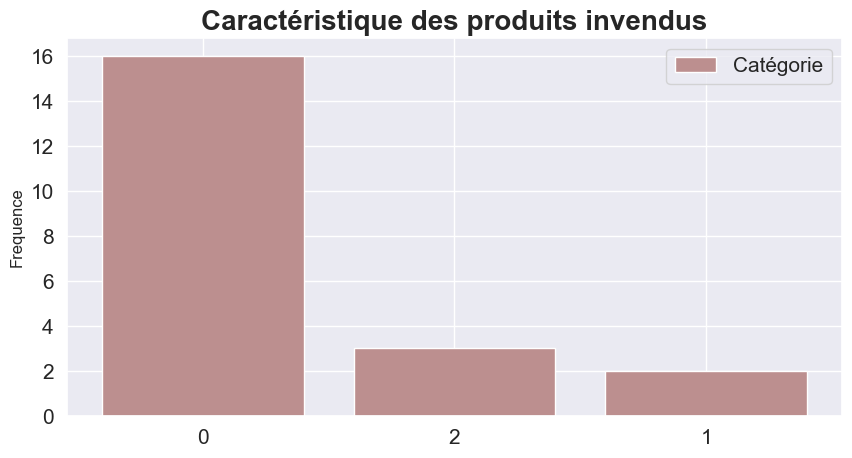

In [39]:
Produits_non_vendus["categ"].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.bar(Produits_non_vendus["categ"].value_counts().reset_index()["index"], 
       Produits_non_vendus["categ"].value_counts().reset_index()["categ"],
       color="rosybrown") 

ax.legend(["Catégorie"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 15)

ax.set_ylabel('Frequence')

ax.set_title("Caractéristique des produits invendus",  fontsize=20,fontweight="bold");

Sur ce graphique, on voit qu'il y a plus de catégorie __0__ que de catégorie __1__ ou __2__ concernant les produits invendus.

##### Fichier final 1

Avant de passer à la jointure 2, je choisis de garder que la jointure interne pour cette première jointure puisque nous avons besoin d'avoir la correspondance entre les prix et les produits pour calculer les CA dans la suite du projet.

In [40]:
Jointure1=Jointure1.loc[Jointure1["_merge"]=="both"]
Jointure1=Jointure1.iloc[:,[0,2,3,4,5,6,7,8,9]]
Jointure1.head(2)

,id_prod,session_id,client_id,date_2,year,month,day,price,categ
0,0_1518,s_211425,c_103,2022-05-20,2022,05,20,4.18,0
1,0_1518,s_95811,c_6197,2021-09-26,2021,09,26,4.18,0


### Jointure 2

In [41]:
#Jointure entre Jointure1 et le fichier Customers
Jointure2=pd.merge(customers, Jointure1, on=["client_id"], how="outer", indicator=True)
Jointure2.sample(3)

,client_id,sex,birth,age,age_category,id_prod,session_id,date_2,year,month,day,price,categ,_merge
50242,c_6880,m,1991,31,30-43,0_1448,s_21417,2021-04-16,2021,04,16,18.94,0,both
458128,c_5674,m,1988,34,30-43,0_1381,s_45075,2021-06-06,2021,06,06,5.99,0,both
246107,c_6141,f,1982,40,30-43,0_1470,s_194655,2022-04-16,2022,04,16,19.53,0,both


In [42]:
Jointure2["_merge"].value_counts()

both          679111
left_only         23
right_only         0
Name: _merge, dtype: int64

D'après l'analyse de cette jointure, avec le left only, nous avons 23 `client_id` qui n'ont pas de correspondance dans le fichier transactions et qui n'ont donc pas fait des achats.

Je vais lister ces clients pour les remonter à la direction.

Dans la suite de cette analyse, je choisis de rester sur la jointure interne pour pouvoir calculer mon CA.

In [43]:
print("Liste des clients qui n'ont pas fait d'achat ")
Client_sans_achat=Jointure2.loc[Jointure2["_merge"] =="left_only"]
Client_sans_achat=Client_sans_achat[["client_id", "age", "sex"]].sort_values(by=['age'])
Client_sans_achat

# nom du fichier excel
file_name2 = "Liste des clients qui n'ont pas fait d'achats.xlsx"
  
# enregister le fichier
Client_sans_achat.to_excel(file_name2)

Liste des clients qui n'ont pas fait d'achat 


,client_id,age,sex
313042,c_6930,18,m
514282,c_6735,18,m
495608,c_5245,18,f
505343,c_5223,19,m
488877,c_6862,20,f
59474,c_8253,21,f
218103,ct_0,21,f
610964,c_90,21,m
670499,ct_1,21,m
319633,c_4358,23,m


##### Fichier final

In [44]:
Fichier_final=Jointure2.loc[Jointure2["_merge"]=="both"]
Fichier_final=Fichier_final.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
Fichier_final.head(3)

,client_id,sex,age,age_category,id_prod,session_id,date_2,year,month,day,price,categ
0,c_4410,f,55,44-56,0_1277,s_184041,2022-03-25,2022,03,25,7.99,0
1,c_4410,f,55,44-56,0_1277,s_94984,2021-09-25,2021,09,25,7.99,0
2,c_4410,f,55,44-56,0_1376,s_94984,2021-09-24,2021,09,24,16.24,0


## Mission I : Analyse des indicateurs de vente

### Analyses du CA

In [45]:
#calcul du CA
print("Le chiffre d'affaires total réalisé par l'entreprise est de:", 
      f"{Fichier_final.price.sum():,.2f} €".replace(",", " "))


Le chiffre d'affaires total réalisé par l'entreprise est de: 11 853 728.68 €


### Caractéristiques et représentation graphiques du CA

In [46]:
# répartition du CA par an avec pivot_table
ca_categ_y = Fichier_final.pivot_table(
    index=["year"], #la variable que je veux considérer pour faire l'étude
    values = "price", # la variable que je veux aggréger
    columns = "categ", #la colonne qui s'affiche en plus (que je veux voir la répartition)
    aggfunc = 'sum') #l'opération que je souhaite faire
ca_categ_y


categ,0,1,2
year,,,
2021,1883020.45,1777995.85,1109810.26
2022,2192970.46,2485275.19,1430436.16
2023,343740.06,390451.65,240028.60


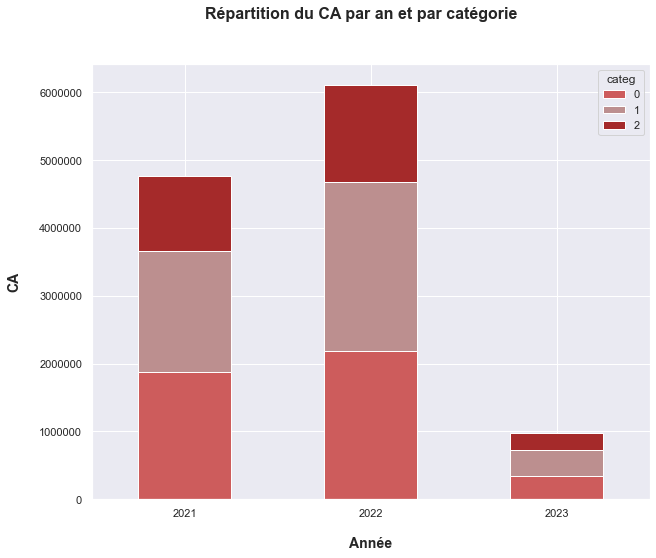

In [47]:
categ_colors=["indianred", "rosybrown","brown"]
ca_categ_y.plot(kind='bar',
                stacked=True,
                figsize=(10, 8),
                color = categ_colors)

plt.suptitle("Répartition du CA par an et par catégorie",
             fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Année',fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");


Sur ce graphique on remarque pour chaque année que c'est la catégorie __1__ qui fait le plus gros du CA, suivi de la catégorie __0__, et enfin de la catégorie __2__ .

In [48]:
# répartition du CA par mois 
ca_categ_m = Fichier_final.pivot_table(
    index=["month"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
ca_categ_m

categ,0,1,2
month,,,
01,345493.57,466372.33,231013.64
02,345654.33,393467.88,253129.05
03,385094.11,393459.43,219343.60
04,380219.72,351402.32,237486.20
05,391059.06,371426.03,247590.98
06,351878.01,391074.10,237152.57
07,331847.79,382492.99,279277.74
08,345110.38,374351.47,269290.21
09,429683.15,385993.32,185678.74


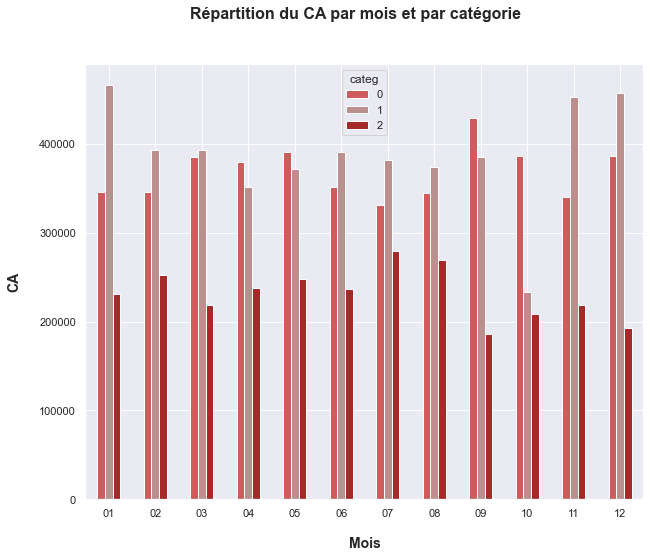

In [49]:
ca_categ_m.plot(kind='bar',
                #stacked=True,
                figsize=(10, 8),
                color = categ_colors)

plt.suptitle("Répartition du CA par mois et par catégorie",
             fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");


Sur ce graphique, on voit surtout des pics de la catégorie 1 en janvier, novembre et décembre avec une forte baisse en octobre.

In [50]:
# répartition du CA par jour avec pivot_table
ca_categ_d = Fichier_final.pivot_table(
    index=["day"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
ca_categ_d.head(5)

categ,0,1,2
day,,,
01,142121.98,164384.28,87194.15
02,136856.55,161243.19,96445.09
03,143321.22,154016.34,82919.27
04,139821.83,146436.45,94358.23
05,140980.46,155174.43,96527.45


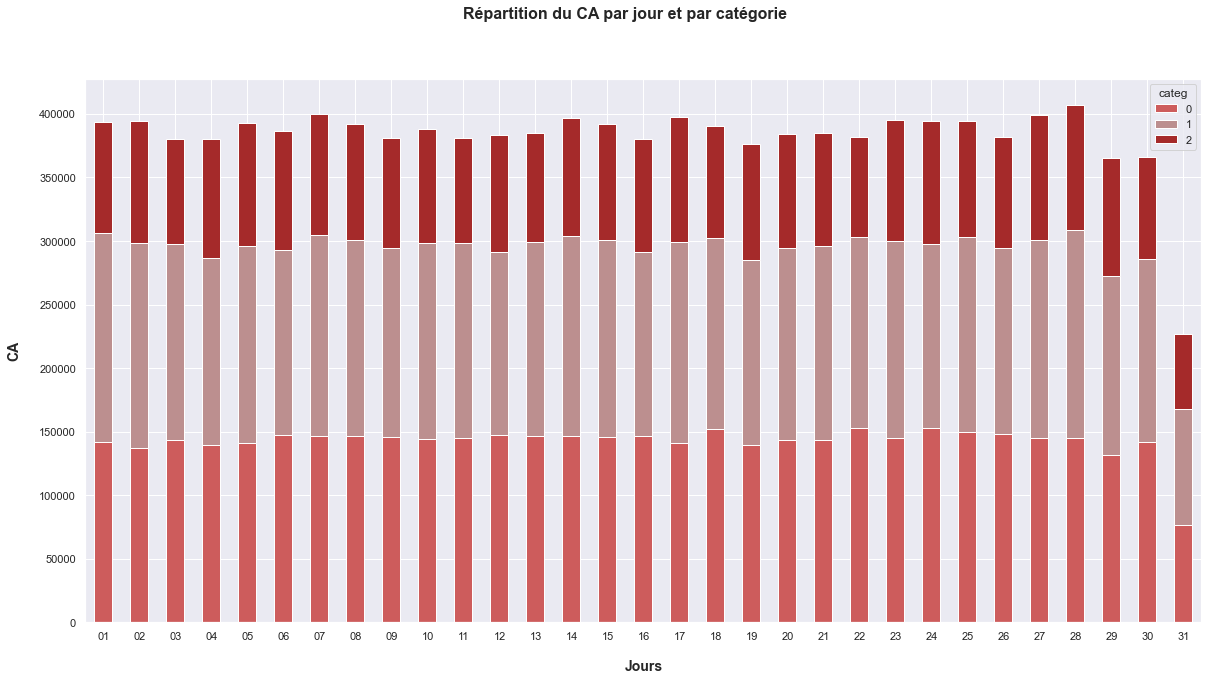

In [51]:
ca_categ_d.plot(kind='bar',
                stacked=True,
                figsize=(20,10),
                color = categ_colors)

plt.suptitle("Répartition du CA par jour et par catégorie",
             fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Jours',fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");

### Evolution du CA dans le temps

In [52]:
evolution_ca = Fichier_final.pivot_table(
    index=["date_2"], #la variable que je veux considérer pour faire l'étude
    values = "price", # la variable que je veux aggréger et qui s'affiche en même temps
    aggfunc = 'sum') #l'opération que je souhaite faire
evolution_ca.head(5)

,price
date_2,
2021-03-01,16565.22
2021-03-02,15486.45
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37


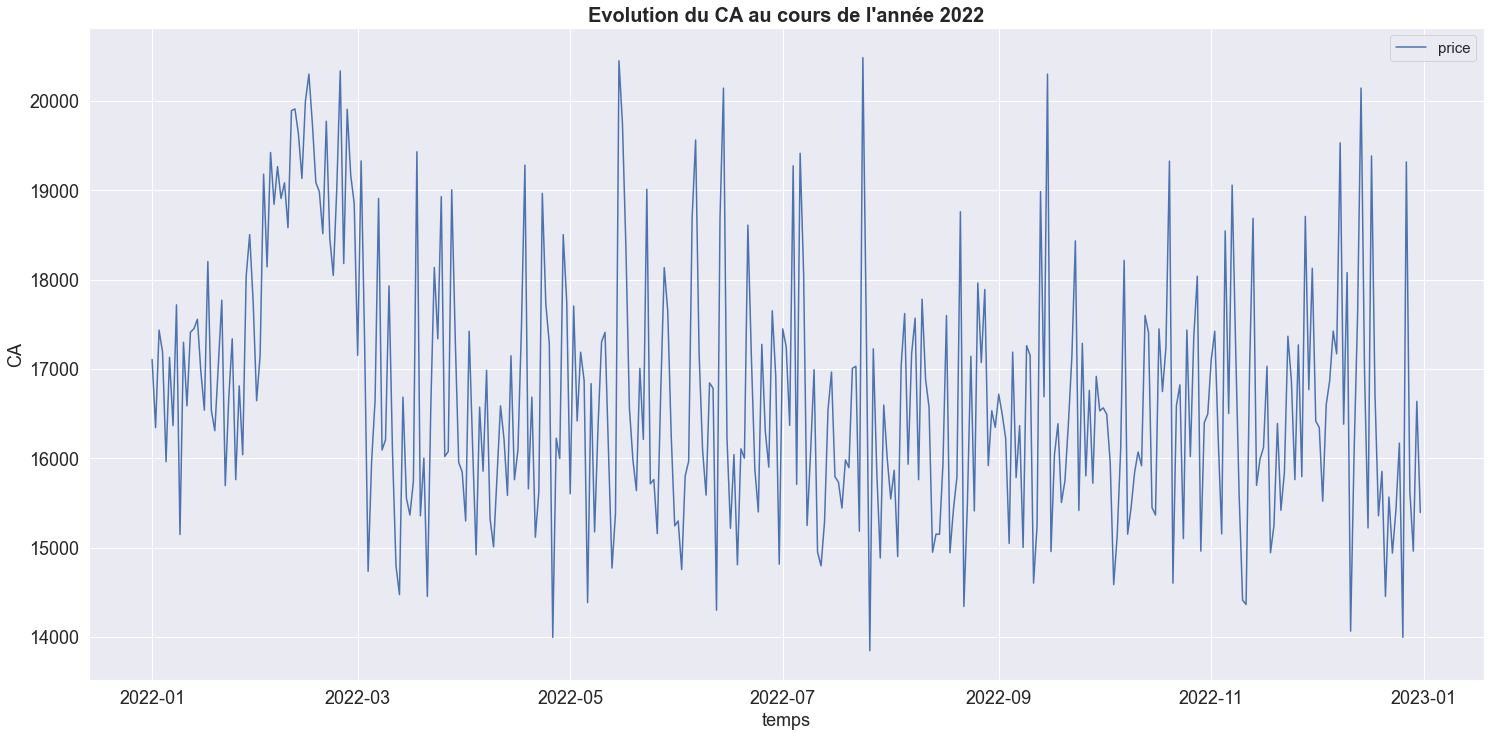

In [53]:
#zoom sur une année complète. Je vais prendre la période du 01/01/2022 au 31/12/2022
année2022=evolution_ca.loc['2022-01-01':'2022-12-31']

fig, ax = plt.subplots(figsize=(25,12))

ax.plot(année2022.reset_index()["date_2"],année2022.reset_index()['price'])  

ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)
ax.set_xlabel('temps', fontsize = 18)
ax.set_title("Evolution du CA au cours de l'année 2022",  fontsize=20,fontweight="bold");

Quand on regarde une année complète (de janvier 2022 à decembre 2022), on voit qu'il y a un pic au 1er trimestre, et le reste de l'année suit la même tendance.

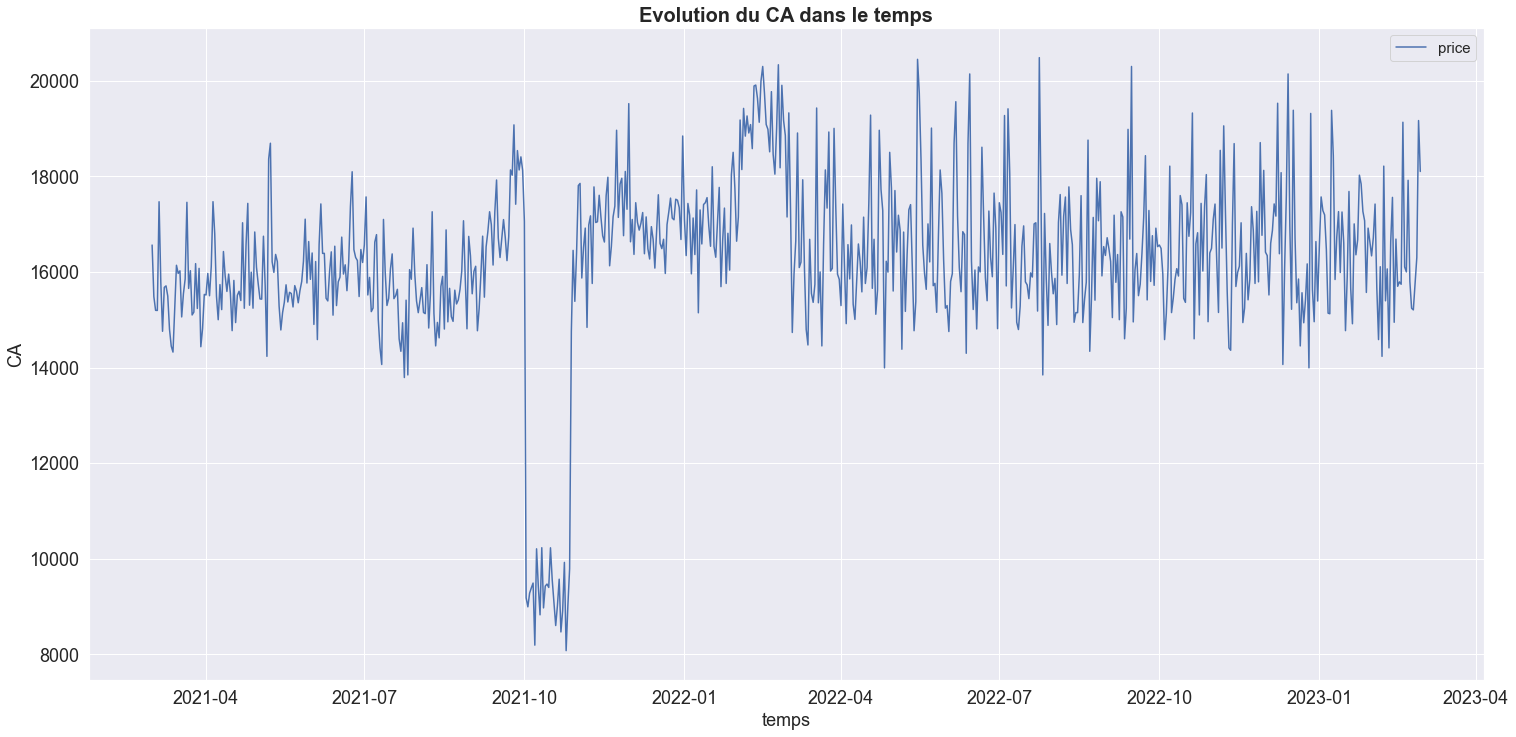

In [54]:
fig, ax = plt.subplots(figsize=(25,12))

ax.plot(evolution_ca.reset_index()["date_2"],evolution_ca.reset_index()['price'])  

ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)
ax.set_xlabel('temps', fontsize = 18)
ax.set_title("Evolution du CA dans le temps",  fontsize=20,fontweight="bold");


Sur ce graphique, on remarque qu'il y a une tendance globale où le CA suit à peu près la même ligne dans le temps. Mais aussi, on remarque une forte baisse au mois d'octobre 2021. On va regarder de plus près ce qu'il se passe au cours de ce mois. Est-ce des anomalies?

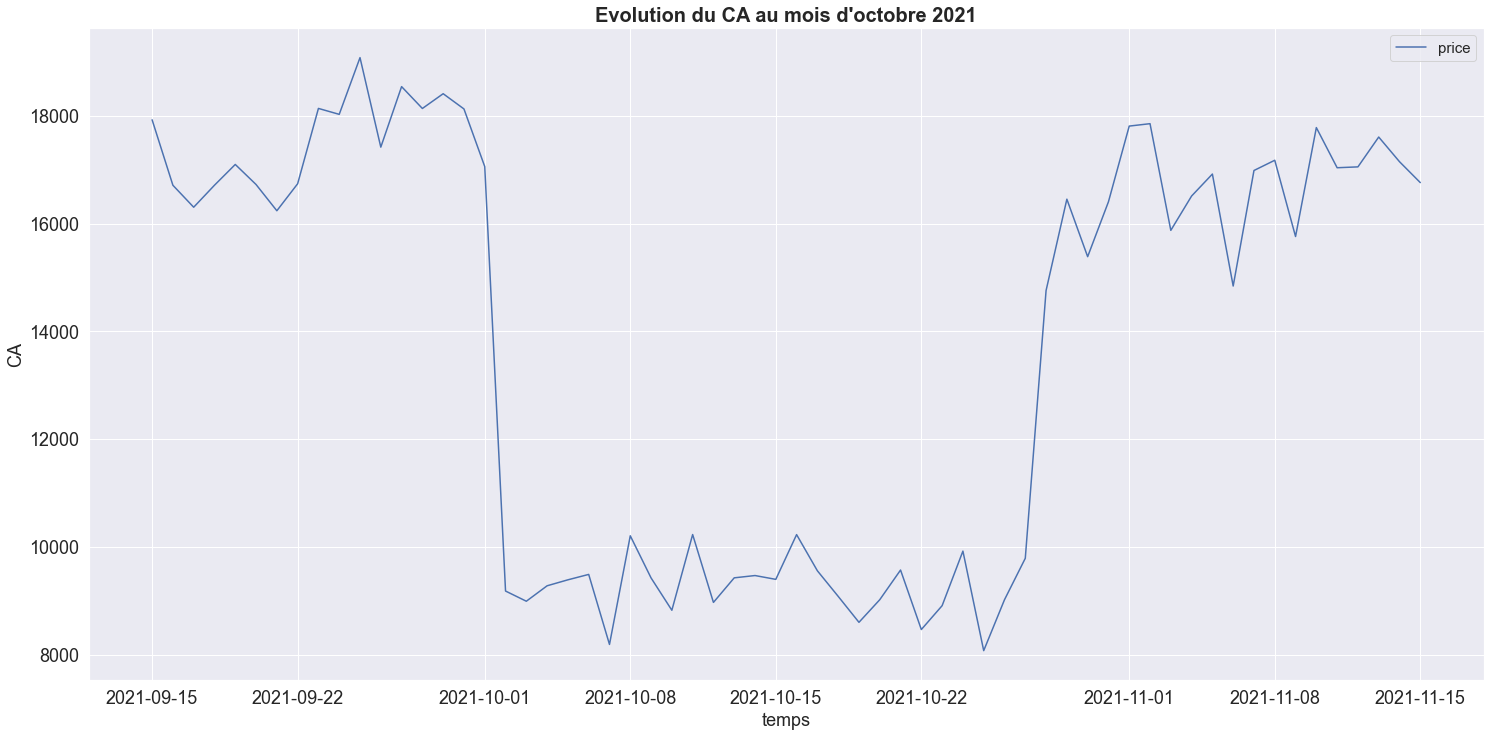

In [55]:
#zoom sur cette période d'anomalie 2021. Je vais prendre la période du 15/09/2021 au 15/11/2021
anomalie2021=evolution_ca.loc['2021-09-15':'2021-11-15']

fig, ax = plt.subplots(figsize=(25,12))

ax.plot(anomalie2021.reset_index()["date_2"],anomalie2021.reset_index()['price'])  

ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)
ax.set_xlabel('temps', fontsize = 18)
ax.set_title("Evolution du CA au mois d'octobre 2021",  fontsize=20,fontweight="bold");

Sur cette graphique, on voit que la baisse du CA commence entre le 1er octobre jusqu'au alentour du 25 octobre. On va analyser cette période en détail.

In [56]:
octobre2021=Fichier_final.groupby(["date_2","categ"]).sum().reset_index()

octobre2021=octobre2021[(octobre2021.date_2 >= '2021-10-01') & (octobre2021.date_2 <= '2021-10-31')]

# répartition du CA par catégorie au mois d'octobre
ca_categ_oct = octobre2021.pivot_table(
    index=["date_2"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
ca_categ_oct

categ,0,1,2
date_2,,,
2021-10-01,6950.50,7003.79,3104.05
2021-10-02,7141.01,NaN,2041.12
2021-10-03,6786.57,NaN,2206.48
2021-10-04,6533.60,NaN,2746.08
2021-10-05,6357.91,NaN,3032.55
2021-10-06,7546.58,NaN,1944.11
2021-10-07,6404.01,NaN,1787.07
2021-10-08,7069.53,NaN,3137.82
2021-10-09,6808.69,NaN,2616.67


Sur cette liste, nous constatons qu'il manque des données concernant la catégorie 1 entre le 02 et le 27 octobre. Cela peut s'expliquer de différentes manières:

  - Il y a eu un problème de remontée de données sur le mois d'octobre.
  - Un bug sur le site a empêché les clients d'en acheter/d'y accéder...
  - Il n'y avait plus de stock (après la rentrée scolaire du mois de septembre)

### Analyse de la série temporelle

#### Décomposition de la série temporelle 

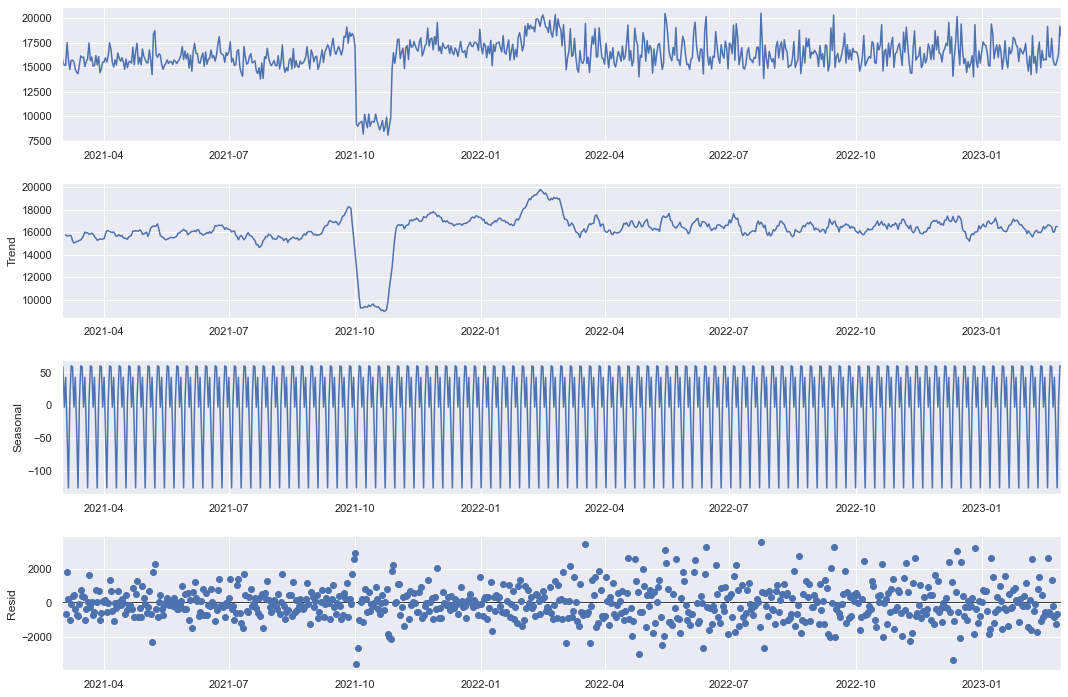

In [57]:
#méthode 1
seasonal_decomp = seasonal_decompose(evolution_ca)
fig=seasonal_decomp.plot()
fig.set_size_inches(15,10)

D'après ces graphes, on peut dire que nos séries chronologiques montrent une tendance assez stable et plate, à part les perturbations au 1er trimestre et en octobre 2021.

Sur la tendance, le lissage ne permet pas d'avoir une amélioration très nette, on reste à peu près sur la même forme que la série initiale

La série n'a pas une énorme saisonnalité, puisque l'échelle oscille entre 0 et -100, qui est relativement faible par rapport au reste.

Et enfin, on voit que la variance des résidus semble être stable et homogène également dans le temps. 

#### Décomposition par moyenne mobile

Ici je vais tester 3 longueurs de fenêtres pour calculer ma moyenne mobile:
- 7 jours 
- 15 jours
- 30 jours 

In [58]:
evolution_ca['Mmobile30']= evolution_ca.price.rolling(30).mean()
evolution_ca['Mmobile15']= evolution_ca.price.rolling(15).mean()
evolution_ca['Mmobile7']= evolution_ca.price.rolling(7).mean()
evolution_ca.tail(8) 

,price,Mmobile30,Mmobile15,Mmobile7
date_2,,,,
2023-02-21,17920.25,16447.966667,16422.490667,16629.465714
2023-02-22,15806.03,16419.038333,16261.758000,16644.368571
2023-02-23,15242.04,16326.179667,16251.372000,16565.444286
2023-02-24,15207.89,16238.370333,16194.168667,16488.778571
2023-02-25,15761.25,16188.068333,16284.076667,16006.747143
2023-02-26,16304.72,16162.444333,16261.974000,16035.021429
2023-02-27,19170.81,16282.368000,16369.171333,16487.570000
2023-02-28,18105.15,16321.900000,16579.605333,16513.984286


Quand on regarde ce tableau, on peut conclure que la série de données est stationnaire puisque la moyenne et la variance ne varient pas dans le temps.

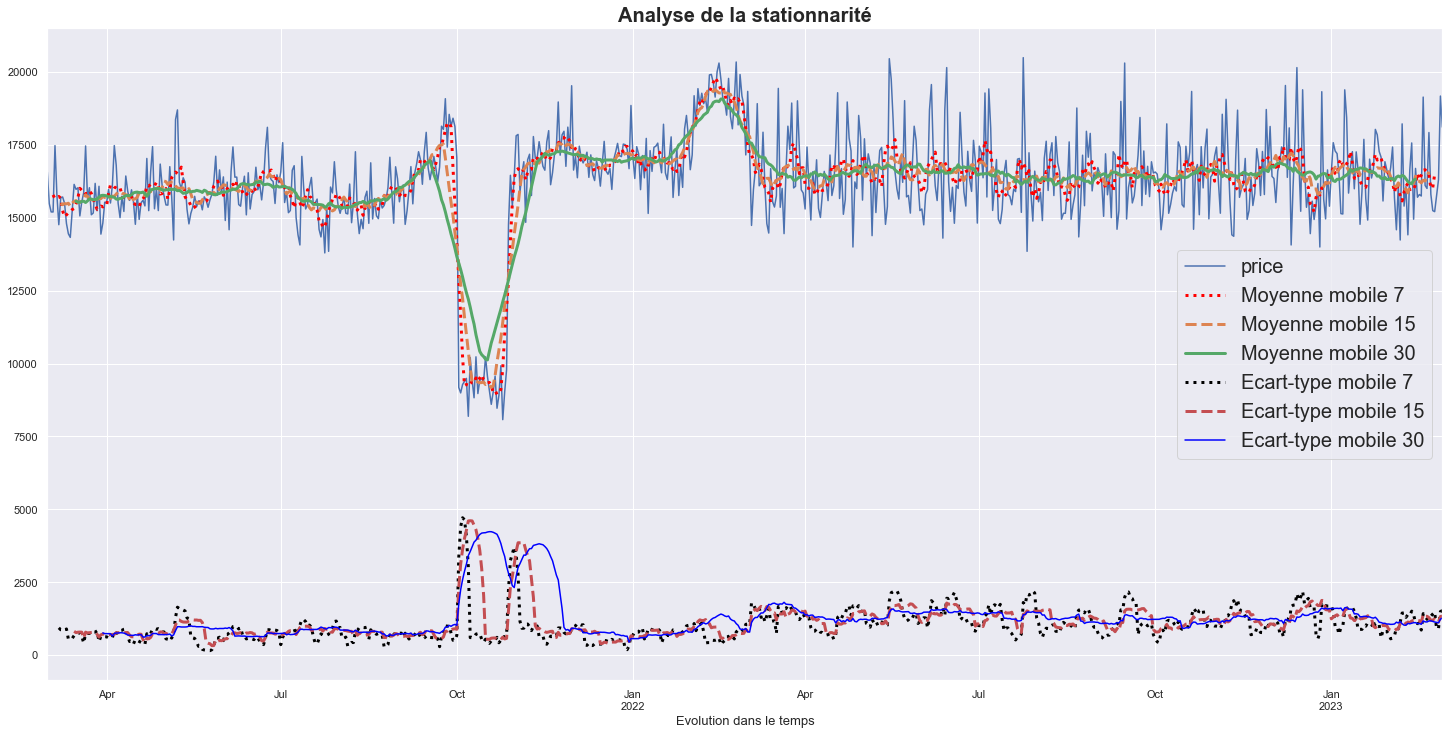

In [59]:
plt.subplots(figsize=(25,12)) 

evolution_ca['price'].plot()
evolution_ca['price'].rolling(window=7, center=True).mean().plot(label="Moyenne mobile 7", lw=3, ls=":", color="red")
evolution_ca['price'].rolling(window=15, center=True).mean().plot(label="Moyenne mobile 15", lw=3, ls="--")
evolution_ca['price'].rolling(window=30, center=True).mean().plot(label="Moyenne mobile 30", lw=3, ls="-")

evolution_ca['price'].rolling(window = 7).std().plot(label = 'Ecart-type mobile 7',lw=3, ls=':', color='black')
evolution_ca['price'].rolling(window = 15).std().plot(label = 'Ecart-type mobile 15',lw=3, ls='--') 
evolution_ca['price'].rolling(window = 30).std().plot(label = 'Ecart-type mobile 30', color="blue") 

plt.legend(fontsize=20)
plt.xlabel('Evolution dans le temps', fontsize = 13)
plt.title("Analyse de la stationnarité",  fontsize=20,fontweight="bold");

Sur ce graphique, c'est la moyenne mobile avec un fenêtrage de 7 jours qui est le mieux adapté. On perd moins de données et c'est là où on a moins d'écart par rapport à la réalité.

##### Zoom sur la moyenne mobile et écart type de 7 jours

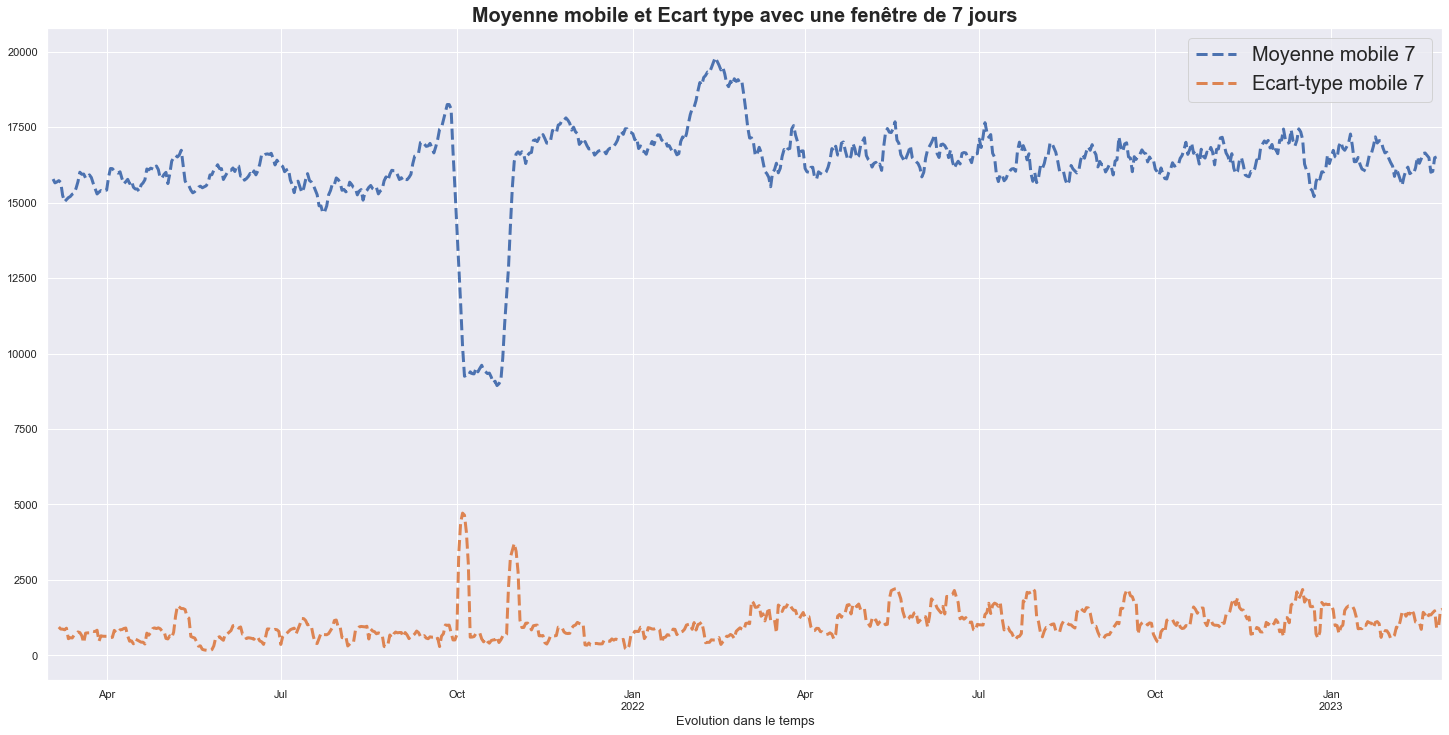

In [60]:
plt.subplots(figsize=(25,12)) 

evolution_ca['price'].rolling(window=7, center=True).mean().plot(label="Moyenne mobile 7", lw=3, ls="--")
evolution_ca['price'].rolling(window = 7).std().plot(label = 'Ecart-type mobile 7',lw=3, ls='--')  

plt.legend(fontsize=20)
plt.xlabel('Evolution dans le temps', fontsize = 13)
plt.title("Moyenne mobile et Ecart type avec une fenêtre de 7 jours",  fontsize=20,fontweight="bold");

En traçant la moyenne mobile et l’écart-type mobile, on constate que la série temporelle est bien stationnaire puisqu'elle reste constante dans le temps. Les lignes sont droites et parallèles à l’axe des x.

__Pour confirmer encore la stationnarité des données, nous pouvons utiliser le test ADF.__


In [61]:
from statsmodels.tsa.stattools import adfuller
from numpy import log


In [62]:
def check_stationarity(ts):
    """ fait passer la time-serie pour montrer si elle est stationnaire ou non: 
    on passe les instructions dessus:
    Je crée 4 variables pour stocker les résultats:
    -dftest:
    -adf statitique:
    -pvalue:
    -critical_value:
    
    Je passe les conditions:
    Si pvalue <0.05 et adf< critical_value, la série est stationnaire,
    sinon elle est non stationnaire
    
    Args:
    string (str)

    Exemples:
    >>>La série est NON stationnaire
    
    """
    
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print('pvalue=%.5f' % (pvalue)) 
    if (pvalue < 0.05) and (adf < critical_value):
        print('La série est stationnaire')
    else:
        print("La série est NON stationnaire")

In [63]:
check_stationarity(evolution_ca['price'])


pvalue=0.00006
La série est stationnaire


#### Correction de l'anomalie en octobre 2021 pour la catégorie 1

Nous allons utiliser le modèle SARIMA(Seasonal ARIMA ou ARIMA saisonnier). Il permet de modéliser les séries temporelles stationnaires comportant une composante saisonnière et désigné par 7 paramètres

- Etape 1: préparer le dataset

In [64]:
#Filtrer par catégorie 1
Analyse_cat_1=Fichier_final.loc[Fichier_final["categ"]=="1"].groupby(["date_2"]).sum()
Analyse_cat_1=Analyse_cat_1.iloc[:,1].reset_index()
Analyse_cat_1=Analyse_cat_1.set_index("date_2")
Analyse_cat_1.head(10)

,price
date_2,
2021-03-01,6811.53
2021-03-02,5627.15
2021-03-03,5691.41
2021-03-04,6098.98
2021-03-05,7071.21
2021-03-06,5884.54
2021-03-07,5590.16
2021-03-08,6222.03
2021-03-09,5514.70


- Étape 2 : Fractionnement de l’entraînement 

In [65]:
train=Analyse_cat_1[:"2021-10-01"] #on indique la date de fin
train.tail()
train.shape

,price
date_2,
2021-09-27,6876.56
2021-09-28,6246.91
2021-09-29,6870.45
2021-09-30,6920.45
2021-10-01,7003.79


(215, 1)

- Etape 3: Initialiser la fonction auto_arima du modèle SARIMA

Ici je vais tester 2 modèles pour voir laquelle est la meilleure.

In [66]:
# Je laisse un degré de liberté jusqu'à 5
model= pm.auto_arima(train, d=0,     #d, p, q sont les 3 coeff de la tendance. D, P, Q qont les 3 coeff de saisonnalité. p est le nombre de termes autorégressifs, d est le nombre de différences non saisonnières, q est le nombre d’erreurs de prévision décalées dans l’équation de prédiction.
                          max_p=2, max_q=2,  
                          max_P=5, max_D=5,
                          max_Q=5, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=5,n_fits = 20)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3388.424, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3275.360, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3326.246, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4341.012, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3252.067, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3239.149, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3241.551, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3230.781, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3301.442, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3232.407, Time=0.31 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.334 seconds


In [67]:
# Je laisse un degré de liberté inférieur
model1= pm.auto_arima(train, d=0, 
                          max_p=2, max_q=2,  
                          max_P=3, max_D=2,
                          max_Q=3, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3388.424, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3275.360, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3326.246, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4341.012, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3252.067, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3239.149, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3241.551, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3230.781, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3301.442, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3232.407, Time=0.24 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.677 seconds


Nous avons les mêmes résultats. Les 2 modèles convergent vers le même modèle ARIMA(1,0,2)

- Etape 4: Montage du modèle Auto ARIMA

        Prediction semaine 1

In [68]:
model1.fit(train)

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [69]:
forecast_df=model1.predict(n_periods=7, return_conf_int=True)
forecast_range=pd.date_range(start='2021-10-02', periods=7,freq='D')
forecast_df = pd.DataFrame(forecast_df[0],index =forecast_range,columns=['price'])
forecast_df

,price
2021-10-02,6650.514116
2021-10-03,6618.237010
2021-10-04,6557.521992
2021-10-05,6501.816805
2021-10-06,6450.708069
2021-10-07,6403.816513
2021-10-08,6360.794161


        Prediction semaine 2

In [70]:
train_S2=pd.concat([train, forecast_df],axis=0)
train_S2.tail()
train_S2.shape

,price
2021-10-04,6557.521992
2021-10-05,6501.816805
2021-10-06,6450.708069
2021-10-07,6403.816513
2021-10-08,6360.794161


(222, 1)

In [71]:
model1.fit(train_S2)

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [72]:
forecast2_df=model1.predict(n_periods=7, return_conf_int=True)
forecast2_df_range=pd.date_range(start='2021-10-09', periods=7,freq='D')
forecast2_df = pd.DataFrame(forecast2_df[0],index =forecast2_df_range,columns=['price'])
forecast2_df

,price
2021-10-09,6308.157152
2021-10-10,6269.447749
2021-10-11,6233.290822
2021-10-12,6200.483051
2021-10-13,6170.714208
2021-10-14,6143.702804
2021-10-15,6119.193421


            Prediction semaine 3

In [73]:
train_S3=pd.concat([train_S2, forecast2_df],axis=0)
train_S3.tail()
train_S3.shape

,price
2021-10-11,6233.290822
2021-10-12,6200.483051
2021-10-13,6170.714208
2021-10-14,6143.702804
2021-10-15,6119.193421


(229, 1)

In [74]:
model1.fit(train_S3)

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [75]:
forecast3_df=model1.predict(n_periods=7, return_conf_int=True)
forecast3_range=pd.date_range(start='2021-10-16', periods=7,freq='D')
forecast3_df = pd.DataFrame(forecast3_df[0],index =forecast3_range,columns=['price'])
forecast3_df

,price
2021-10-16,6094.124770
2021-10-17,6073.446635
2021-10-18,6054.541995
2021-10-19,6037.470453
2021-10-20,6022.054262
2021-10-21,6008.132911
2021-10-22,5995.561451


            Prediction semaine 4

In [76]:
train_S4=pd.concat([train_S3, forecast3_df],axis=0)
train_S4.tail()
train_S4.shape

,price
2021-10-18,6054.541995
2021-10-19,6037.470453
2021-10-20,6022.054262
2021-10-21,6008.132911
2021-10-22,5995.561451


(236, 1)

In [77]:
model1.fit(train_S4)

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [78]:
forecast4_df=model1.predict(n_periods=5, return_conf_int=True)
forecast4_range=pd.date_range(start='2021-10-23', periods=5,freq='D')
forecast4_df = pd.DataFrame(forecast4_df[0],index =forecast4_range,columns=['price'])
forecast4_df


,price
2021-10-23,5984.247963
2021-10-24,5974.002979
2021-10-25,5964.753349
2021-10-26,5956.399481
2021-10-27,5948.854627


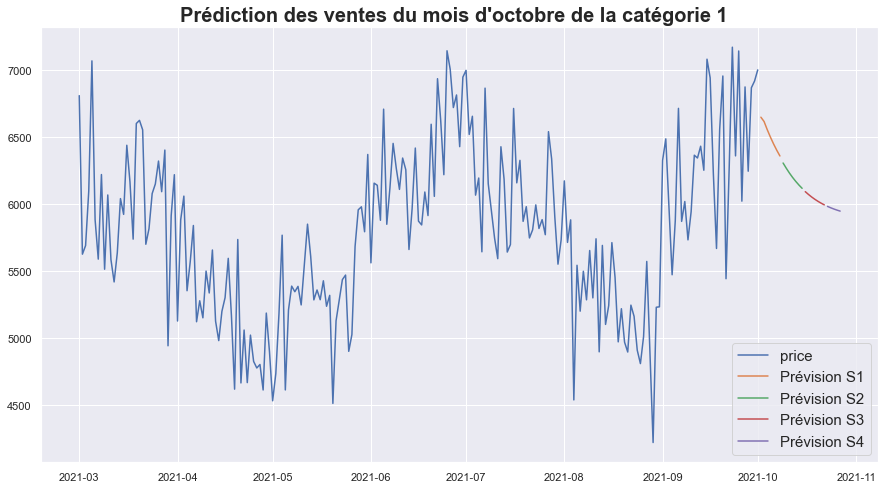

In [79]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

ax1.plot(train)
ax1.plot(forecast_df)
ax1.plot(forecast2_df)
ax1.plot(forecast3_df)
ax1.plot(forecast4_df)

ax1.legend(["price", "Prévision S1", "Prévision S2", "Prévision S3", "Prévision S4"], prop={'size':15})

plt.title("Prédiction des ventes du mois d'octobre de la catégorie 1  ",  fontsize=20,fontweight="bold");

#### Imputation des données


In [80]:
#les valeurs à rajouter dans le fichier final

imputation=pd.concat([forecast_df, forecast2_df, forecast3_df,forecast4_df],axis=0).reset_index().rename(columns = {"index": "date_2"})
imputation["categ"]='1'
imputation

,date_2,price,categ
0,2021-10-02,6650.514116,1
1,2021-10-03,6618.237010,1
2,2021-10-04,6557.521992,1
3,2021-10-05,6501.816805,1
4,2021-10-06,6450.708069,1
5,2021-10-07,6403.816513,1
6,2021-10-08,6360.794161,1
7,2021-10-09,6308.157152,1
8,2021-10-10,6269.447749,1
9,2021-10-11,6233.290822,1


Ici on a les prévisions des ventes journalières concernant la catégorie 1, pour le mois d'octobre 2021.

In [81]:
#aperçu des données pour la période entre 2021-10-01 et 2021-10-28 et concernant la catégorie 1
Fichier_final2=pd.concat([Fichier_final,imputation],axis=0)
Fichier_final2.loc[(Fichier_final2.date_2>="2021-10-01") & (Fichier_final2.date_2<= "2021-10-28") & (Fichier_final2.categ=="1")] 

,client_id,sex,age,age_category,id_prod,session_id,date_2,year,month,day,price,categ
285,c_285,f,55.0,44-56,1_435,s_111199,2021-10-28,2021,10,28,11.990000,1
431,c_1013,m,40.0,30-43,1_451,s_111108,2021-10-28,2021,10,28,20.990000,1
676,c_4389,m,38.0,30-43,1_614,s_98591,2021-10-01,2021,10,01,10.730000,1
927,c_6616,f,68.0,+56,1_285,s_111256,2021-10-28,2021,10,28,14.990000,1
1248,c_2487,f,64.0,+56,1_618,s_98559,2021-10-01,2021,10,01,29.360000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-23,NaN,NaN,NaN,5984.247963,1
22,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24,NaN,NaN,NaN,5974.002979,1
23,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-25,NaN,NaN,NaN,5964.753349,1
24,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-26,NaN,NaN,NaN,5956.399481,1


#### Graphe montrant l'évolution du CA dans le temps après imputation des données

In [82]:
evolution_ca_v2 = Fichier_final2.pivot_table(
    index=["date_2"], 
    values = "price", 
    aggfunc = 'sum') 
evolution_ca_v2.head(5)

,price
date_2,
2021-03-01,16565.22
2021-03-02,15486.45
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37


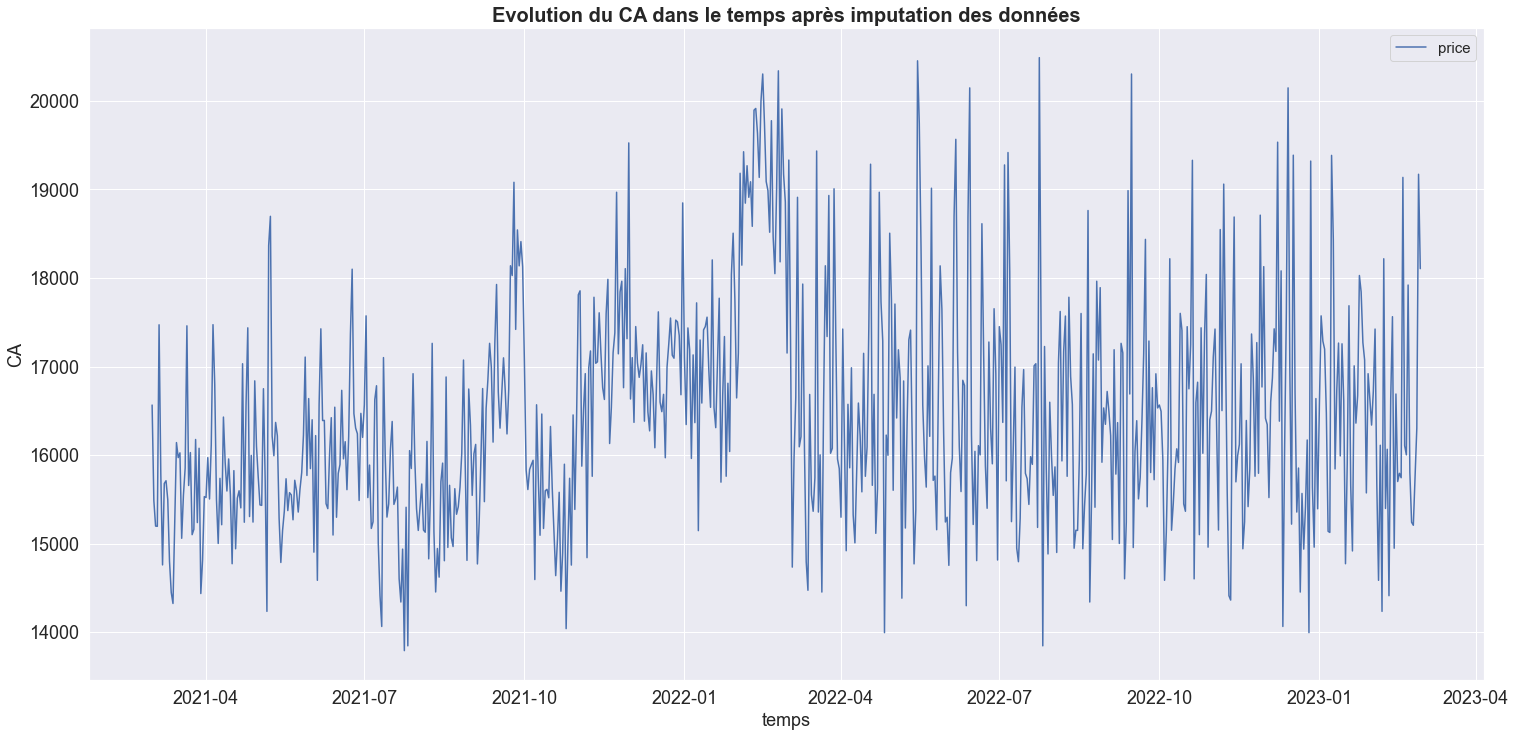

In [83]:
fig, ax = plt.subplots(figsize=(25,12))

ax.plot(evolution_ca_v2.reset_index()["date_2"],evolution_ca_v2.reset_index()['price'])  

ax.legend(["price"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)
ax.set_xlabel('temps', fontsize = 18)
ax.set_title("Evolution du CA dans le temps après imputation des données",  fontsize=20,fontweight="bold");

## Mission II - Analyses sur les catégories de références

### Tops références

In [84]:
#Liste des 10 produits qui font le plus gros CA
Top_CA=Fichier_final2.groupby(by=['id_prod', 'categ']).sum().sort_values(by=['price'], ascending=False)
Top_CA=Top_CA.iloc[:,1].reset_index().rename(columns = {'price':'CA'})
Top_CA.head(10)

,id_prod,categ,CA
0,2_159,2,94893.50
1,2_135,2,69334.95
2,2_112,2,65407.76
3,2_102,2,60736.78
4,2_209,2,56971.86
5,1_395,1,54356.25
6,1_369,1,54025.48
7,2_110,2,53846.25
8,2_39,2,53060.85
9,2_166,2,52449.12


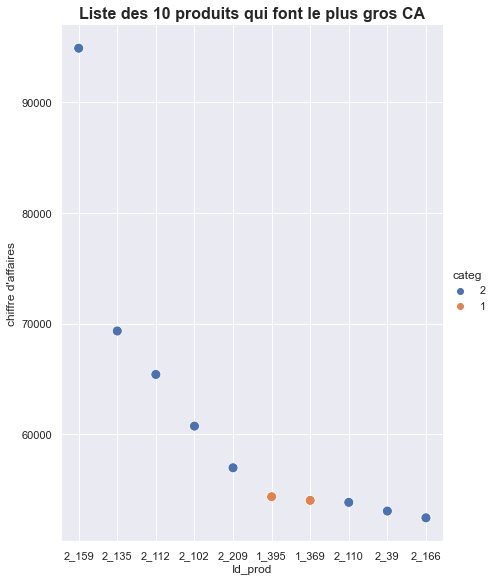

In [85]:

sns.relplot(data = Top_CA.head(10), kind="scatter",
              x = 'id_prod',
              y='CA',
              hue='categ',
           height=8, aspect=0.8,
           s=100)

plt.title("Liste des 10 produits qui font le plus gros CA",
          fontsize=16,fontweight='bold')
plt.ylabel("chiffre d'affaires",fontsize=12)
plt.xlabel('Id_prod',fontsize=12);

In [86]:
#Liste des 10 produits LES PLUS VENDUS en quantités
Top_produits=Fichier_final2.groupby(by=['id_prod', 'categ']).count().sort_values(by=['session_id'], ascending=False).head(10)
Top_produits.iloc[:,4].head(10).reset_index()

,id_prod,categ,session_id
0,1_369,1,2252
1,1_417,1,2189
2,1_414,1,2180
3,1_498,1,2128
4,1_425,1,2096
5,1_403,1,1960
6,1_412,1,1951
7,1_413,1,1945
8,1_406,1,1939
9,1_407,1,1935


### Flops références

In [87]:
#Liste des 10 produits qui font les plus PETITS CA
FLOP_CA=Fichier_final2.groupby(by=['id_prod', 'categ']).sum().sort_values(by=['price'], ascending=True)
FLOP_CA=FLOP_CA.iloc[:,1].reset_index().rename(columns = {'price':'CA'})
FLOP_CA.head(10)

,id_prod,categ,CA
0,0_1539,0,0.99
1,0_1284,0,1.38
2,0_1653,0,1.98
3,0_1601,0,1.99
4,0_807,0,1.99
5,0_541,0,1.99
6,0_1728,0,2.27
7,0_1498,0,2.48
8,0_898,0,2.54
9,0_1840,0,2.56


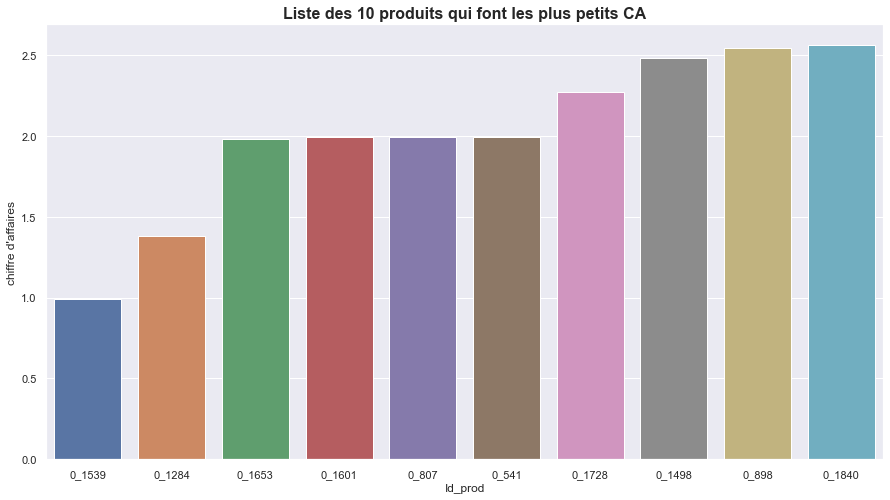

In [88]:
plt.figure(figsize =(15,8)) 
sns.barplot(data=FLOP_CA.head(10), x="id_prod", y="CA")

plt.title('Liste des 10 produits qui font les plus petits CA',
         fontsize=16,fontweight='bold')
plt.ylabel("chiffre d'affaires",fontsize=12)
plt.xlabel('Id_prod',fontsize=12);


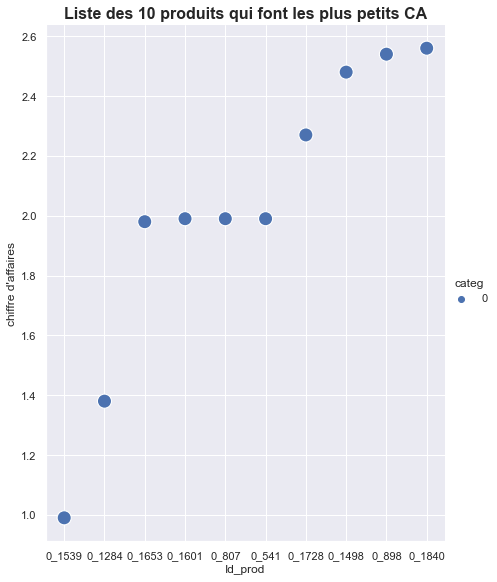

In [89]:
sns.relplot(data = FLOP_CA.head(10), kind="scatter",
              x = 'id_prod',
              y='CA',
              hue='categ',
           height=8, aspect=0.8,
           s=200)

plt.title("Liste des 10 produits qui font les plus petits CA",
          fontsize=16,fontweight='bold')
plt.ylabel("chiffre d'affaires",fontsize=12)
plt.xlabel('Id_prod',fontsize=12);

In [90]:
#Liste des 10 produits LES MOINS VENDUS en quantité
FLOP_références=Fichier_final2.groupby(by=['id_prod', 'categ']).count().sort_values(by=['session_id'], ascending=True).head(10)
FLOP_références=FLOP_références.iloc[:,4].reset_index()
FLOP_références.head(10)

,id_prod,categ,session_id
0,0_2201,0,1
1,0_1601,0,1
2,0_549,0,1
3,2_81,2,1
4,0_807,0,1
5,0_1683,0,1
6,0_1151,0,1
7,0_1633,0,1
8,0_833,0,1
9,0_886,0,1


Ce sont des produits de la catégorie 0 qui font flop!

### Répartition par catégorie

In [91]:
# Le nombre de produits vendus par catégorie par mois/an/jour
produit_categ = Fichier_final2.pivot_table(
    index=["year"], 
    values = "id_prod", #la variable que je veux considérer
    columns = "categ",
    aggfunc = 'count')  
produit_categ

categ,0,1,2
year,,,
2021,176984,86716,14548
2022,206152,121412,18816
2023,32323,19041,3119


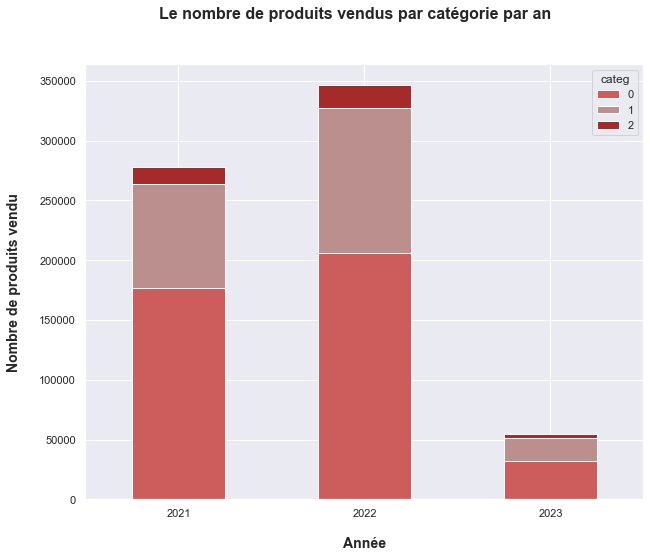

In [92]:
produit_categ.plot(kind='bar',
                stacked=True,
                figsize=(10, 8),
                color = categ_colors)

plt.suptitle("Le nombre de produits vendus par catégorie par an",
             fontsize=16,fontweight='bold')
plt.ylabel('Nombre de produits vendu',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Année',fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");

## Mission III - Analyses sur le profil des clients

### Caractéristiques des clients

#### CA en fonction des catégories d'âge

In [93]:

ca_age = Fichier_final2.pivot_table(
    index=["age_category"], #la variable que je veux considérer pour faire l'étude
    values = "price", # la variable que je veux aggréger
    columns = "categ", #la colonne qui s'affiche en plus (que je veux voir la répartition)
    aggfunc = 'sum') #l'opération que je souhaite faire
ca_age

categ,0,1,2
age_category,,,
-30,177806.32,615097.56,2501934.32
30-43,2330621.35,1367645.92,93546.06
44-56,1386318.00,1379006.40,101286.73
+56,524985.30,1291972.81,83507.91


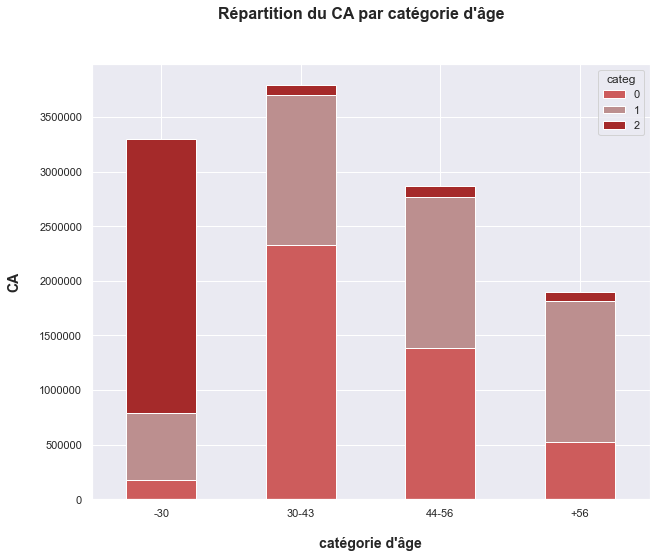

In [94]:

ca_age.plot(kind='bar',
                stacked=True,
                figsize=(10, 8),
                color = categ_colors)

plt.suptitle("Répartition du CA par catégorie d'âge",
             fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel("catégorie d'âge",fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");

#### Nombres de livres en fonction de catégorie d'âge

In [95]:
nbre_age = Fichier_final2.pivot_table(
    index=["age_category"], #la variable que je veux considérer pour faire l'étude
    values = "price", # la variable que je veux aggréger
    columns = "categ", #la colonne qui s'affiche en plus (que je veux voir la répartition)
    aggfunc = 'count') #l'opération que je souhaite faire
nbre_age

categ,0,1,2
age_category,,,
-30,16695,29975,33182
30-43,218951,66837,1036
44-56,130522,67326,1229
+56,49291,63031,1036


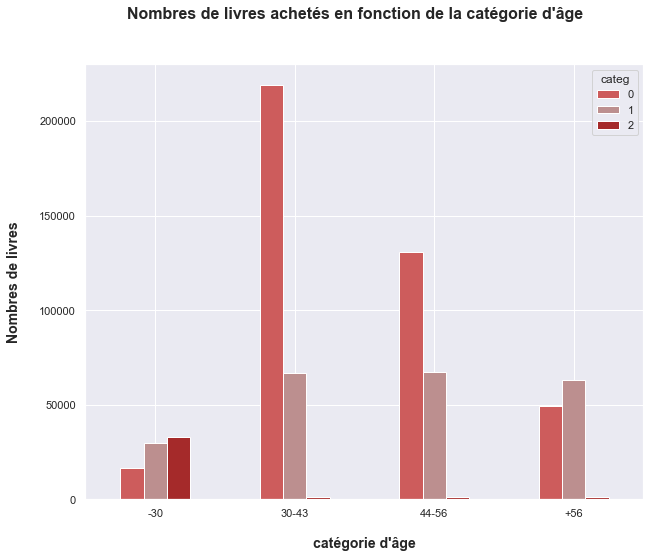

In [96]:
nbre_age.plot(kind='bar',
                figsize=(10, 8),
                color = categ_colors)

plt.suptitle("Nombres de livres achetés en fonction de la catégorie d'âge",
             fontsize=16,fontweight='bold')
plt.ylabel('Nombres de livres',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel("catégorie d'âge",fontsize=14, fontweight='bold',labelpad=18)
plt.xticks(rotation = 0)
plt.ticklabel_format(style="plain", axis="y");

Ce sont les moins de 30 ans qui achètent plus les livres de catégorie 2. Et ce sont les personnes entre 30 et 43 ans qui achètent le plus des livres de catégorie 0

#### Les Tops clients

In [97]:
Top_client=Fichier_final2.groupby(by=['client_id']).sum().sort_values(by=['price'], ascending=False).head(10)
Top_client

,age,price
client_id,,
c_1609,1070496.0,324033.35
c_4958,119485.0,289760.34
c_6714,495774.0,153598.92
c_3454,358810.0,113637.93
c_3263,14911.0,5276.87
c_1570,15867.0,5271.62
c_2899,2940.0,5214.05
c_2140,18090.0,5208.82
c_7319,17808.0,5155.77


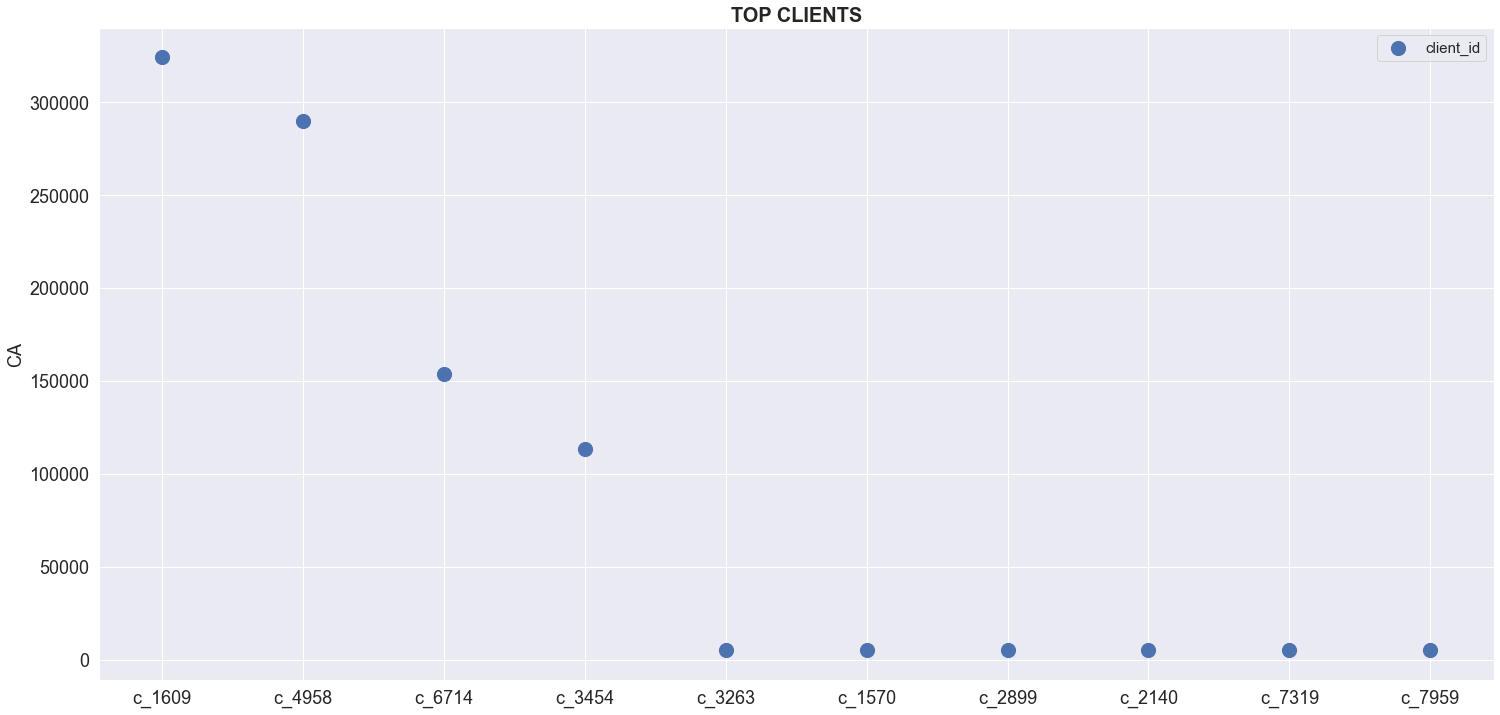

In [98]:
fig, ax = plt.subplots(figsize=(25,12)) 

ax.scatter(Top_client.reset_index()['client_id'], Top_client.reset_index()['price'], s=200)  

ax.legend(["client_id"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)

ax.set_title("TOP CLIENTS",  fontsize=20,fontweight="bold");

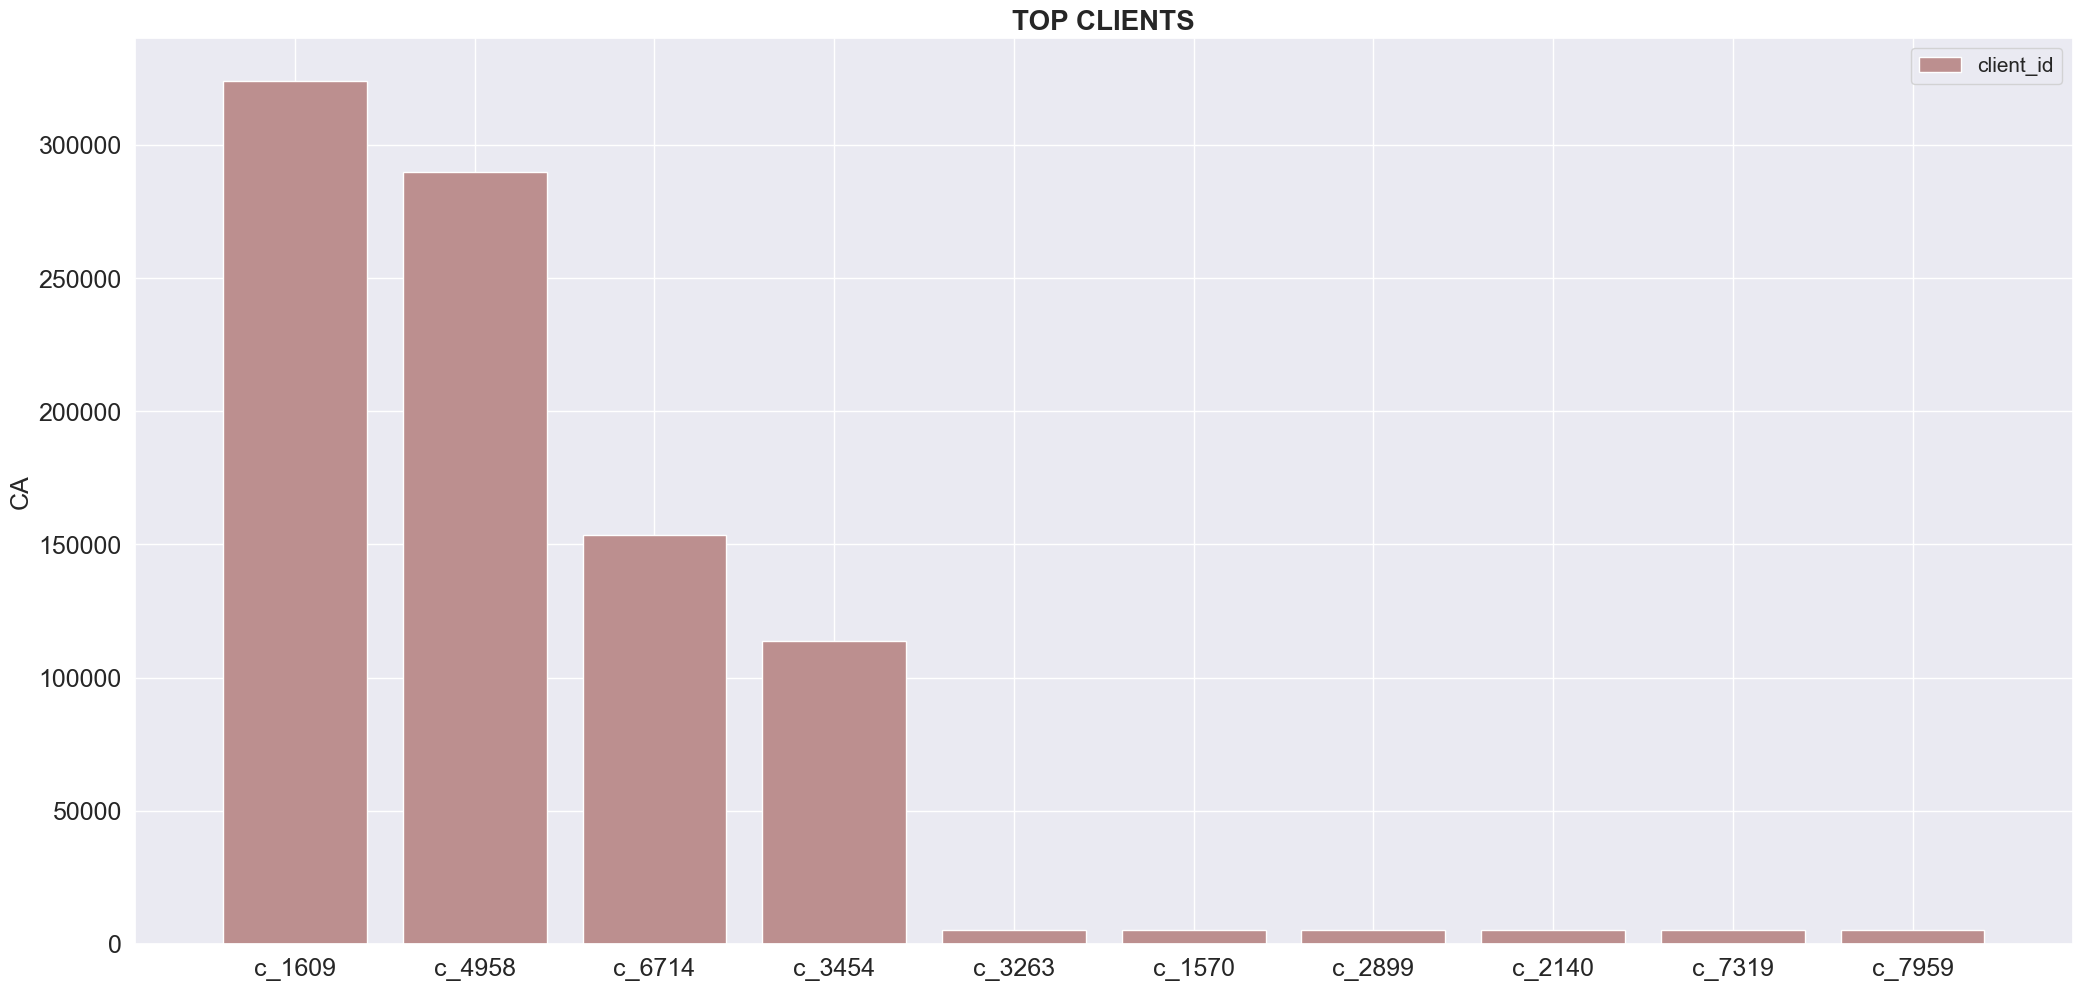

In [99]:
fig, ax = plt.subplots(figsize=(25,12), dpi=100) 

ax.bar(Top_client.reset_index()['client_id'], Top_client.reset_index()['price'],color="rosybrown")  

ax.legend(["client_id"], prop={'size':15})
ax.tick_params(axis='both', labelsize= 18)
ax.set_ylabel('CA', fontsize = 18)

ax.set_title("TOP CLIENTS",  fontsize=20,fontweight="bold");

Sur ce graphique, on remarque une grande différence entre les 4 meilleurs clients et le reste. Ces clients doivent êtres des clients professionnels ou revendeurs, et le reste sont des particuliers.

##### Zoom sur ces 4 gros clients

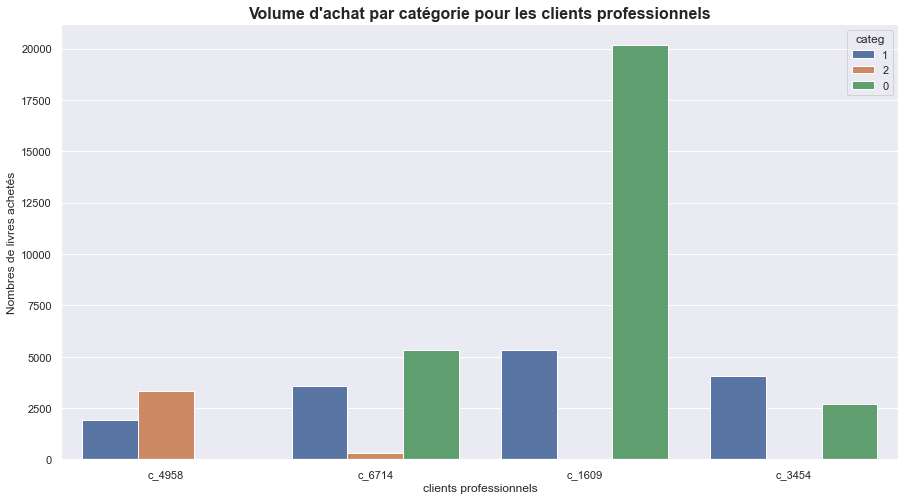

In [100]:
client_pro=["c_1609","c_4958","c_6714","c_3454"]

sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(data = Fichier_final2.loc[Fichier_final2.client_id.isin(client_pro)],
              x = 'client_id',
              hue = 'categ')
plt.title("Volume d'achat par catégorie pour les clients professionnels",
          fontsize=16,fontweight='bold')
plt.xlabel("clients professionnels")
plt.ylabel("Nombres de livres achetés");

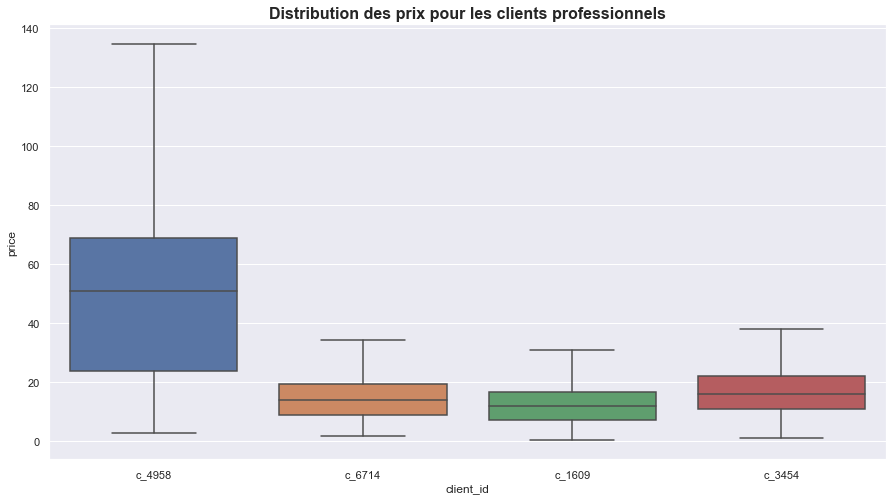

In [101]:
sns.boxplot(data = Fichier_final2.loc[Fichier_final2.client_id.isin(client_pro)],
            y = 'price',
            x = 'client_id',
            showfliers = False) #ne pas montrer les outliers
plt.title("Distribution des prix pour les clients professionnels",
         fontsize=16,fontweight='bold'); 

Intérprétation: 
- client c_4958: le prix médian est de 50€. C'est le client qui achète qui achète plus de produits de la catégorie 2.
- client c_1609: C'est celui qui achète une très grande quantité de produits de la catégorie 0. Le prix median est environ 15€
- Pour les 2 derniers clients, ils ont a peu près les mêmes prix médian entre 16 et 19€



#### Analyses des concentrations ou des inégalités selon la courbe de Lorenz

##### Analyse avec les clients professionnels

In [102]:
Tous_clients=Fichier_final2.groupby(by=['client_id']).sum().reset_index().iloc[:,[0,2]]
Tous_clients.sample(2)

,client_id,price
8290,c_8478,582.92
6725,c_7066,61.96


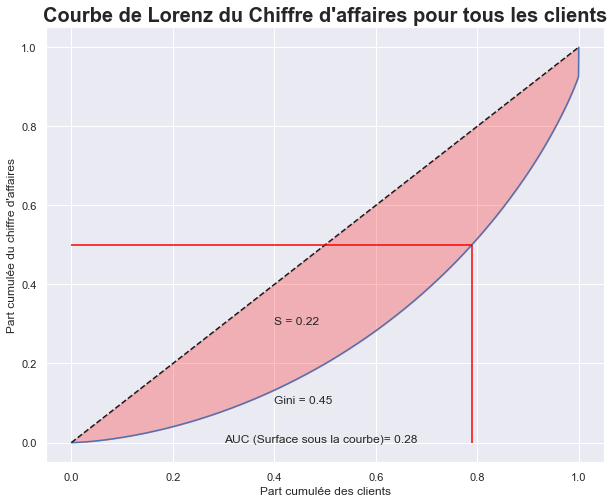

In [103]:
#il faut trier les individus dans l'ordre croissant des valeurs de la variable ; nous le faisons ici grâce à  np.sort()
lorenz = np.cumsum(np.sort(Tous_clients["price"].values)) / Tous_clients["price"].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0,1,len(Tous_clients["price"])+1) 
AUC = (lorenz.sum()-0.5)/len(Tous_clients["price"])
S = 0.5 - AUC 
gini = 2*S

plt.figure(figsize =(10,8)) 
plt.plot(xaxis,lorenz)
plt.plot(xaxis,xaxis,'k--')
plt.fill_between(xaxis, lorenz, xaxis, interpolate = True, color = "red", alpha=0.25) # surface de concentration
plt.hlines(0.5, 0, xaxis[np.searchsorted(lorenz, 0.5)], color='red') #CA mediale horizontale
plt.vlines(xaxis[np.searchsorted(lorenz, 0.5)], 0, 0.5, color='red') #CA mediale verticale
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.title("Courbe de Lorenz du Chiffre d'affaires pour tous les clients",fontsize=20,fontweight="bold")
plt.grid(True)
plt.text(0.4, 0.3, f"S = {S:.2f}")
plt.text(0.3, 0, f"AUC (Surface sous la courbe)= {AUC:.2f}")
plt.text(0.4, 0.1, f"Gini = {gini:.2f}"); 

D'après ce graphique, on peut voir:

- La bissectrice qui indique l'égalité parfaite. Plus la courbe de lorenz s'éloigne de cette diagonale, plus il y a une inégalité entre les 2 variables
- La surface de concentration est assez intense et l'indice de Gini est d'environ 0.45. Celà signifie que la situation est  inégalitaire et que le chiffre d'affaire se concentre chez peu de clients.
- La médiale nous montre que presque 80% des clients font la première moitié du CA, et 20% des clients restant font l'autre moitié du CA. Celà suit aussi la loi de Pareto 80/20


##### Analyse avec uniquement les particuliers

In [104]:
client_particulier=Tous_clients.loc[~Tous_clients.client_id.isin(client_pro)]
client_particulier.sample(2)

,client_id,price
5573,c_6026,2066.29
7084,c_739,540.07


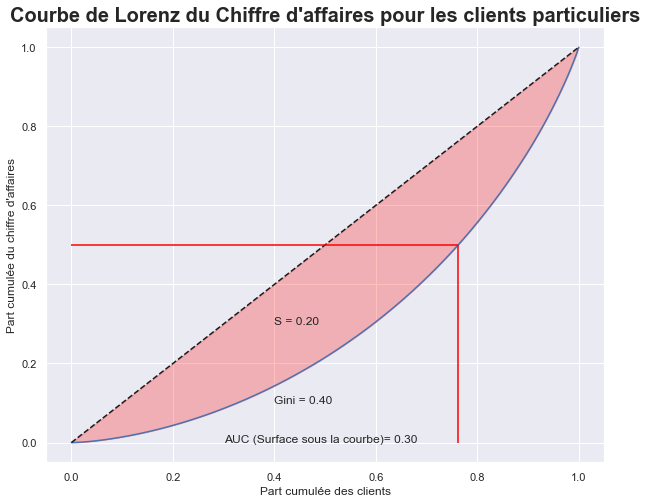

In [105]:
lorenz = np.cumsum(np.sort(client_particulier["price"].values)) / client_particulier["price"].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0,1,len(client_particulier["price"])+1) 
AUC = (lorenz.sum()-0.5)/len(client_particulier["price"])
S = 0.5 - AUC 
gini = 2*S

plt.figure(figsize =(10,8)) 
plt.plot(xaxis,lorenz)
plt.plot(xaxis,xaxis,'k--')
plt.fill_between(xaxis, lorenz, xaxis, interpolate = True, color = "red", alpha=0.25) # surface de concentration
plt.hlines(0.5, 0, xaxis[np.searchsorted(lorenz, 0.5)], color='red') #CA mediale horizontale
plt.vlines(xaxis[np.searchsorted(lorenz, 0.5)], 0, 0.5, color='red') #CA mediale verticale
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.title("Courbe de Lorenz du Chiffre d'affaires pour les clients particuliers",fontsize=20,fontweight="bold")
plt.grid(True)
plt.text(0.4, 0.3, f"S = {S:.2f}")
plt.text(0.3, 0, f"AUC (Surface sous la courbe)= {AUC:.2f}")
plt.text(0.4, 0.1, f"Gini = {gini:.2f}"); 

D'après ce graphique, on voit que la situation est plus égalitaire que précédemment. On a un indice de Gini qui a diminué et qui se rapproche plus de 0 quand on enlève les 4 gros clients professionnels.

## Mission IV- Tests de corrélations

### Est-ce qu'il y a une corrélation entre le genre d’un client et les catégories des livres achetés?

Nous allons supprimer les clients professionnels pour que l'étude ait du sens. Nous n'allons pas leur attribuer un genre et un âge.

In [106]:
Fichier_particulier=Fichier_final2.loc[~Fichier_final2.client_id.isin(client_pro)]
Fichier_particulier.sample(3)

,client_id,sex,age,age_category,id_prod,session_id,date_2,year,month,day,price,categ
146114,c_7835,f,59.0,+56,1_347,s_181219,2022-03-19,2022,03,19,21.99,1
470708,c_6775,m,39.0,30-43,1_446,s_231604,2022-06-30,2022,06,30,23.92,1
262083,c_8343,f,33.0,30-43,0_2123,s_43514,2021-06-03,2021,06,03,9.99,0


In [107]:
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import pearsonr

__Ici nous allons tester la correlation entre 2 variables qualitative catégorielle avec au moins 2 groupes. Donc je vais utiliser le test de contingence Khi2__


In [108]:
#table de contingence qui montrent les valeurs observés
pd.crosstab(Fichier_particulier["sex"],Fichier_particulier["categ"], margins=True,margins_name="Total")
contingency_table=pd.crosstab(Fichier_particulier["sex"],Fichier_particulier["categ"]) 


categ,0,1,2,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


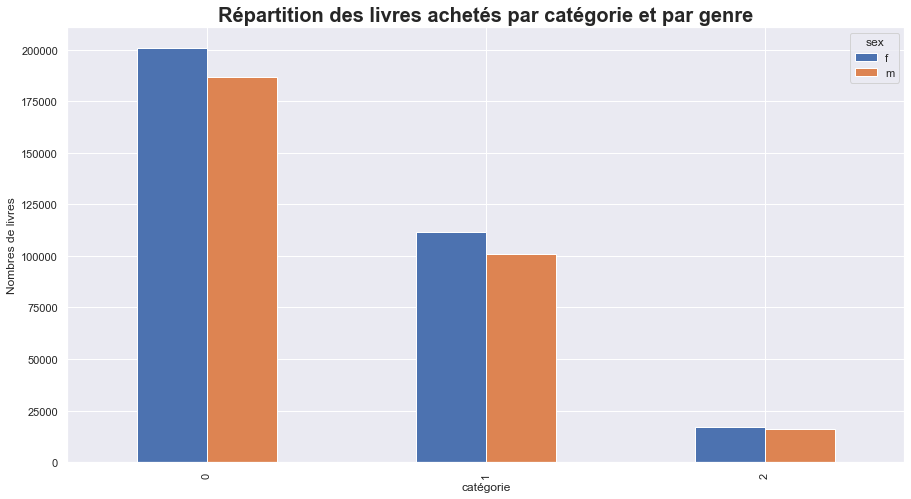

In [109]:
contingency_table.T.plot(kind = "bar")
plt.xlabel("catégorie")
plt.ylabel("Nombres de livres")
plt.title("Répartition des livres achetés par catégorie et par genre",fontsize=20,fontweight="bold");

Sur ce graphique, la relation entre le genre et la catégorie n'est pas évidente. Nous allons passer le test de Chi2 pour confirmer ce que l'on voit

##### Heatmap des valeurs observées

In [110]:
cont=pd.crosstab(Fichier_particulier["sex"],Fichier_particulier["categ"], margins=True,margins_name="Total")

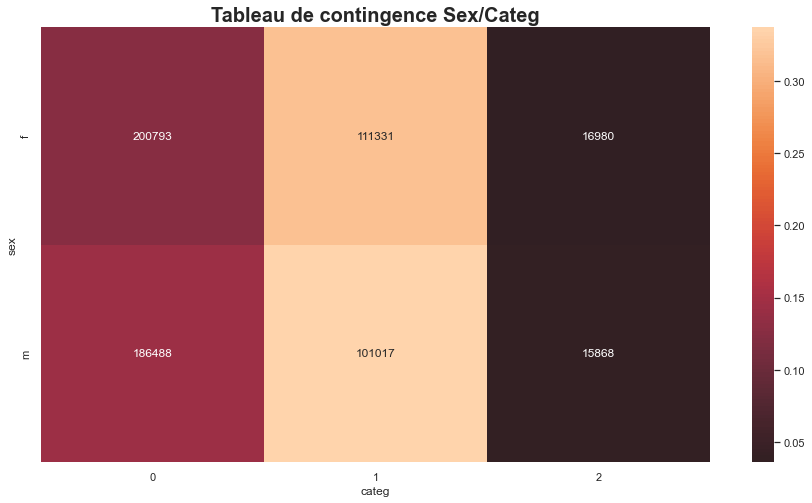

In [111]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(Fichier_particulier)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],center=0, fmt='.0f')
plt.title('Tableau de contingence Sex/Categ',fontsize=20,fontweight="bold");

In [112]:
table

categ,0,1,2,Total
sex,,,,
f,0.126206,0.317419,0.035959,0.000028
m,0.143057,0.337240,0.039960,0.000025
Total,0.000032,0.000018,0.000003,0.000053


Selon ce heatmap, on peut dire qu'il y a plus de dépendance entre la catérogie 1 et le sexe, que les 2 autres catégories. Plus le coefficient de corrélation se rapproche de 1, plus il y a une dépendance.

#### Poses d'hypothèses

Nous allons poser les hypothèses ci-dessous:
 - __H0__ :Les variables sont indépendantes, il n'y a pas de relation entre la catégorie de produits et le genre
 - __H1__: Les variables sont dépendantes, il existe une relation entre la catégorie de produits et le genre

#### Test de khi2

In [113]:
alpha = 0.01

chi2_stat, p, dof, expected = chi2_contingency(contingency_table) 
print('Significance level: ',alpha)
print('P-value=%.5f' % (p)) 
       
if p<=alpha:
    print("Rejet de H0, il y a un lien entre les 2 variables")
else:
    print("on accepte H0, il n'y a pas de lien entre les 2 variables")


Significance level:  0.01
P-value=0.00004
Rejet de H0, il y a un lien entre les 2 variables


In [114]:
Expected_Values = chi2_contingency(contingency_table)[3]
Valeurs_attendues=pd.DataFrame(Expected_Values)
Valeurs_attendues.index=["f","m"]
Valeurs_attendues.columns=["0","1","2"]
Valeurs_attendues = np.round(Valeurs_attendues)
Valeurs_attendues

,0,1,2
f,201518.0,110493.0,17092.0
m,185763.0,101855.0,15756.0


Le test nous démontre qu'il y a un lien entre le genre et la catégorie de produit acheté:
- Il y a une différence entre les valeurs observées et les valeurs qu'on est censé avoir en cas d'indépendance des variables.
- P < 0.01, c'est à dire que même à un seuil de confiance de 99% (ou de risque à 1%), le pvalue est toujours en dessous, donc on peut rejeter H0. 

#### Analyse de la force de corrélation entre les variables

In [115]:
import researchpy as rp

In [116]:
ctab, chitest, expected= rp.crosstab(Fichier_particulier["sex"],Fichier_particulier["categ"], margins=False,
           test= "chi-square", expected_freqs=True)

print(chitest)


                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   20.2135
1                    p-value =    0.0000
2                 Cramer's V =    0.0057


- Selon le résultat du test V de Cramer, on un résultat très proche de 0, ce qui signifie que la force de corrélation entre les 2 catégories est quand même très faible.

### Est-ce qu'il y a une corrélation entre l’âge des clients et le montant total des achats?

In [117]:
Fichier_particulier1=Fichier_final.loc[~Fichier_final.client_id.isin(client_pro)] #enlever les nan
age_CA=Fichier_particulier1.groupby(["client_id","age"]).sum().reset_index()
age_CA.sort_values(by=['client_id'], ascending=True).head(5)

,client_id,age,price
0,c_1,67,558.18
1,c_10,66,1353.60
2,c_100,30,254.85
3,c_1000,56,2261.89
4,c_1001,40,1812.86


In [118]:
#calcul moyenne par âge pour identifier les différents comportements
age_CA_moyenne=age_CA.groupby(["age"]).mean().reset_index()
age_CA_moyenne.head(5)

,age,price
0,18,1393.624005
1,19,1228.936414
2,20,1270.188621
3,21,1427.981600
4,22,1213.293971


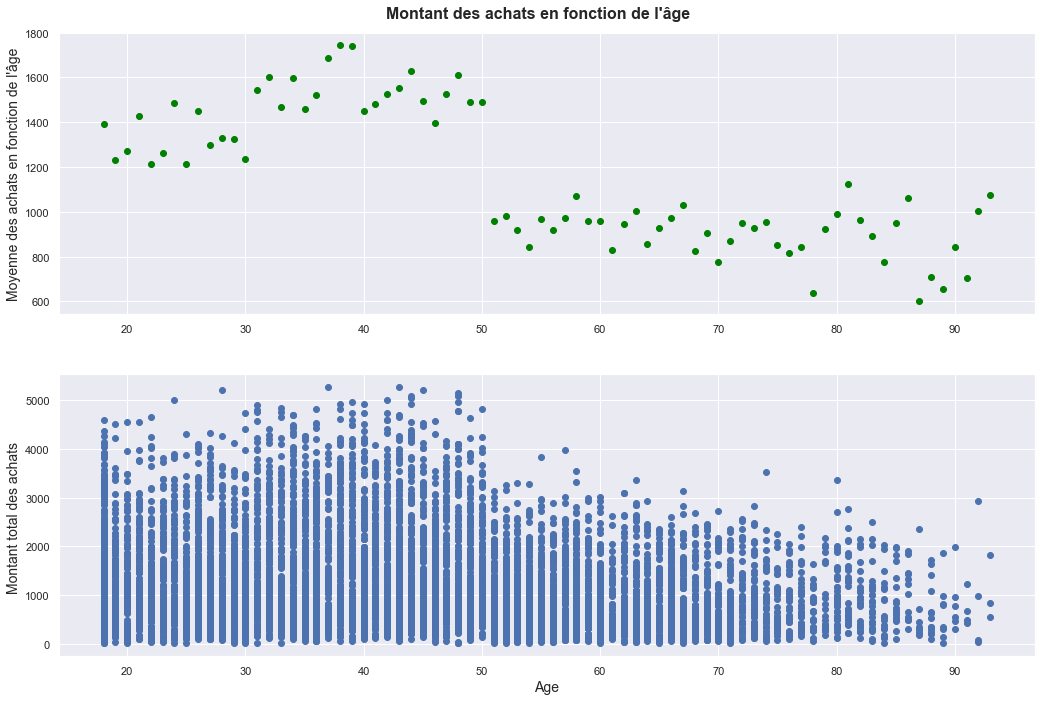

In [119]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 10)) #(nbre ligne, nbre colonne)

fig.tight_layout(pad=3) #donner un peu d'espace
ax1.scatter(x=age_CA_moyenne["age"], y=age_CA_moyenne["price"], color="green")
ax2.scatter(x=age_CA.reset_index()["age"], y=age_CA.reset_index()["price"])
ax2.set_xlabel('Age',fontsize=14)
ax1.set_ylabel("Moyenne des achats en fonction de l'âge",fontsize=14)
ax2.set_ylabel("Montant total des achats ",fontsize=14)

fig.suptitle("Montant des achats en fonction de l'âge",fontsize=16,fontweight='bold');

Sur ces 2 graphiques, on voit à première vue que le montant des achats diminue avec l'âge. Nous allons affirmer ou non ceci avec un test statistique.

Nous constatons 2 comportements bien disctincts avant 50 ans et après 50 ans.

Ici, on est face à 2 variables quantitatives. Donc pour savoir s'il y a une corrélation entre l'âge et le montant des achats, il y a plusieurs étapes à suivre:


- __Etape 1__: Vérifier les conditions de paramétrage des variables. 
- __Etape 2__: Choisir le test de correlation à effectuer en fonction

#### Test de normalité 

Pour savoir si on doit utiliser un test paramétrique ou non pour l'analyse statistique, nous allons faire des tests de normalité

##### Test de Shapiro-Wilk

In [120]:
from scipy import stats
from scipy.stats import shapiro

Nous allons poser les hypothèses ci-dessous:

__H0__ :Les données sont normalement distribuées. Elles suivent une loi normale.

__H1__: Les données ne sont pas normalement distribuées. Elles ne suivent pas la loi normale.

In [121]:
def shapiro_test(data, alpha=0.01):
    pvalue= shapiro(data)[1]
    if pvalue < alpha:
        print("pvalue:", pvalue)
        print("Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté")
    else:
        print("Avec un seuil de confiance à 99%, les données sont normalement distribuées")


In [122]:
shapiro_test(age_CA.set_index("client_id"))

pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté


##### Test de kolmogorov-Smirnov

In [123]:
from scipy.stats import kstest

In [170]:
stat, pvalue= stats.kstest(age_CA.iloc[:,[1,2]].set_index("age"), 'norm') #avoir le même shape
print("pvalue: %.3f" % pvalue)
print("Le pvalue est < 0.05, donc H0 est rejetté. Les données ne suivent pas une loi normale.")

pvalue: 0.000
Le pvalue est < 0.05, donc H0 est rejetté. Les données ne suivent pas une loi normale.


Avec ces résultats, nous allons choisir un test non paramétrique pour tester la corrélation entre l'âge et le montant des achats.

#### Test de corrélation - Test de Spearman (Test de Pearson non paramétrique)

__H0__ :Les variables sont indépendantes, il n'y a pas de correlation entre l'âge et le montant des achats

__H1__: Il y a une correlation entre l'âge et le montant des achats.

In [125]:
def spearman_test(data, alpha=0.01):
    pvalue= stats.spearmanr(data)[1]
    coeff_correlation= st.spearmanr(data)[0]
    print("pvalue: %.3f" % pvalue)
    print("coefficient de correlation: %.3f" % coeff_correlation)
    if pvalue < alpha:
        print("Avec un seuil de confiance à 99%, H0 est rejetté. Les variables sont correlées")
    else:
        print("Avec un seuil de confiance à 99%, il n'y a pas de corrélation entre les variables.")


In [126]:
Fichier_age_CA=age_CA.groupby(by="age").sum().reset_index()
Fichier_age_CA.sample(5)

,age,price
24,42,289581.23
16,34,330760.73
69,87,4793.55
37,55,141511.17
28,46,224471.58


In [127]:
spearman_test(Fichier_age_CA)

pvalue: 0.000
coefficient de correlation: -0.874
Avec un seuil de confiance à 99%, H0 est rejetté. Les variables sont correlées


Le coefficient de corrélation à -0.87 nous indique qu'en général la corrélation est forte et négative. En d'autres termes, plus l'âge augmente, plus le montant des achats diminue.

Toutefois, comme on a vu sur la courbe des tendances, on peut créer 2 groupes bien distinctes.

#### Analyse de la corrélation

##### Groupe 1 - Avant 50 ans

In [128]:
avant_50_ans=Fichier_age_CA.loc[Fichier_age_CA["age"] <= 50]
spearman_test(avant_50_ans)

pvalue: 0.007
coefficient de correlation: 0.463
Avec un seuil de confiance à 99%, H0 est rejetté. Les variables sont correlées


Le coefficient de corrélation nous indique que la corrélation est moyennement forte et positive. En d'autres termes, le montant des achats augmente avec l'âge. Ceci est vrai jusqu'à 50 ans.

##### Calcul du r et r²

In [129]:
r1 = st.pearsonr(avant_50_ans["age"],avant_50_ans["price"])[0]
print("r: %.3f" % r1)
print("r\u00b2 :", r1*r1)

r: 0.068
r² : 0.004662119826639249


Ici on a le r² qui tend vers 0. En d'autres termes, plus le coefficient de détermination se rapproche de 0, plus la dépendance des 2 variables est faible.

##### Groupe 2 - Après 50 ans

In [130]:
après_50_ans=Fichier_age_CA.loc[Fichier_age_CA["age"] > 50]
spearman_test(après_50_ans)

pvalue: 0.000
coefficient de correlation: -0.963
Avec un seuil de confiance à 99%, H0 est rejetté. Les variables sont correlées


Le coefficient de corrélation nous indique que la corrélation est très forte et négative. En d'autres termes, le montant des achats diminue fortement avec l'âge à partir de 50 ans.

##### Calcul du r et r²

In [131]:
r2 = st.pearsonr(après_50_ans["age"],après_50_ans["price"])[0]
print("r: %.3f" % r2)
print("r\u00b2 :", r2*r2)

r: -0.937
r² : 0.8771060878015412


Le r proche de -1 nous indique que les deux variables sont dépendantes, et qu'elles évoluent en sens opposé.

Le r² nous indique que 87% des variations du montant total des achats s'expliqueraient par l'âge. En effet, plus le r² tend vers 1, plus le nuage de points se resserre autour de la droite de régression.

##### <font color='blue'>Graphes</font>

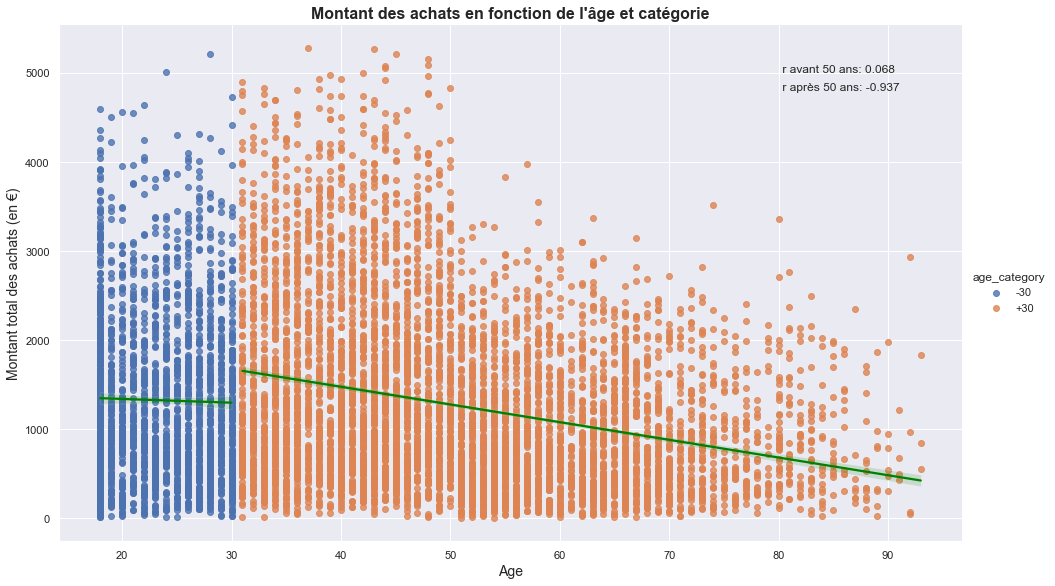

In [132]:
bins= [0,30,100]
labels = ['-30','+30']
age_CA['age_category'] = pd.cut(age_CA['age'], bins, labels=labels)
sns.lmplot(data=age_CA,x="age", y="price", hue="age_category", 
           height=8, aspect=1.7, line_kws={"color":"green"}) 
plt.title("Montant des achats en fonction de l'âge et catégorie",
          fontsize=16,fontweight='bold')
plt.ylabel("Montant total des achats (en €)",fontsize=14)
plt.xlabel ('Age', fontsize=14)
plt.text(80, 4800, f" r après 50 ans: %.3f" % r2)
plt.text(80, 5000, f" r avant 50 ans: %.3f" % r1);

### Est-ce qu'il y a une corrélation entre l'âge et la fréquence d'achat?

La fréquence d'achat est le temps écoulé entre deux achats d'un client. Donc nous allons calculer la fréquence comme la moyenne du nombre de jours entre chaque session d'achat.

In [133]:
fréquence=Fichier_particulier1.iloc[:,[0,2,5,10,6]]
fréquence=fréquence.sort_values(by=['client_id','date_2'], ascending=True)
fréquence.head(5)

,client_id,age,session_id,price,date_2
356551,c_1,67,s_47346,19.53,2021-06-11
356576,c_1,67,s_65433,11.99,2021-07-21
356568,c_1,67,s_66947,12.30,2021-07-25
356548,c_1,67,s_67467,18.94,2021-07-26
356540,c_1,67,s_67769,11.99,2021-07-27


In [134]:
fréquence["date_3"]=fréquence["date_2"].shift(-1)
fréquence["fréquence"]= (fréquence["date_3"] - fréquence["date_2"]).dt.days
fréquence=fréquence[(fréquence["fréquence"]> 0)] #enlever les valeurs négatives
fréquence.head(3)

,client_id,age,session_id,price,date_2,date_3,fréquence
356551,c_1,67,s_47346,19.53,2021-06-11,2021-07-21,40.0
356576,c_1,67,s_65433,11.99,2021-07-21,2021-07-25,4.0
356568,c_1,67,s_66947,12.30,2021-07-25,2021-07-26,1.0


In [135]:
# calcul de la fréquence :
fréquence=fréquence.groupby(['client_id','age'])["fréquence"].mean().reset_index()
fréquence.head(5)

,client_id,age,fréquence
0,c_1,67,18.218750
1,c_10,66,20.515152
2,c_100,30,129.500000
3,c_1000,56,8.023529
4,c_1001,40,16.697674


In [136]:
# calcul de la fréquence moyenne par âge pour identifier les différents comportements
fréquence_moyenne=fréquence.groupby(["age"]).mean().reset_index()
fréquence_moyenne.head(5)

,age,fréquence
0,18,54.065916
1,19,67.270687
2,20,57.282967
3,21,56.809028
4,22,62.278252


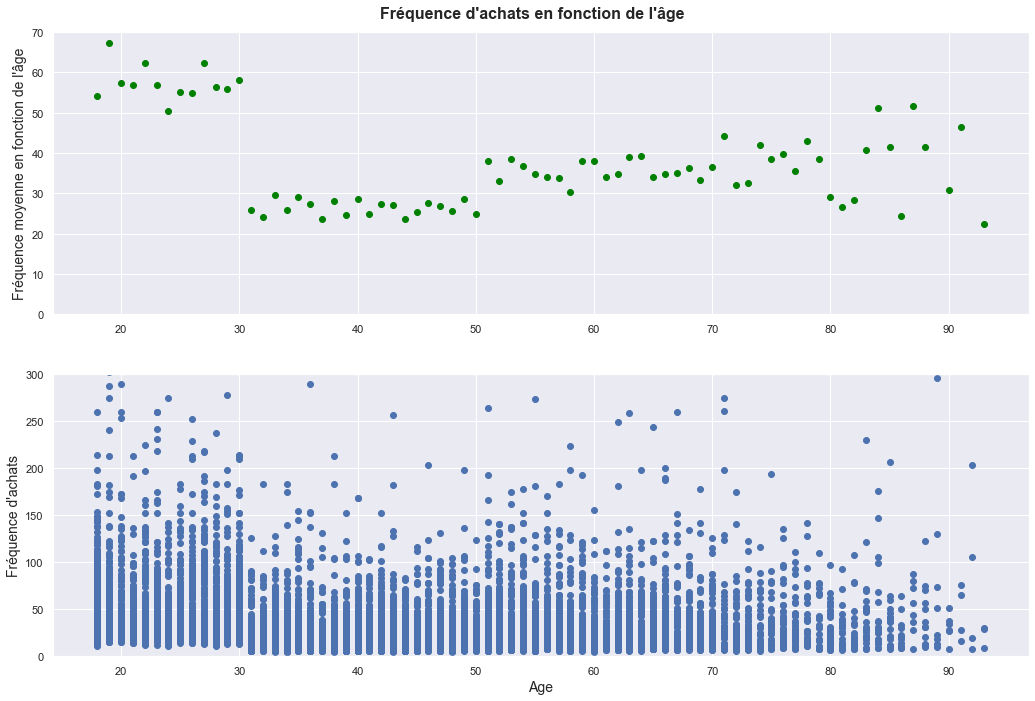

In [137]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 10)) #(nbre ligne, nbre colonne)

fig.tight_layout(pad=3) #donner un peu d'espace
ax1.scatter(x=fréquence_moyenne["age"], y=fréquence_moyenne["fréquence"], color="green")
ax2.scatter(x=fréquence["age"], y=fréquence["fréquence"])
ax1.set_ylim(0,70) #supprimer quelques valeurs aberrantes
ax2.set_ylim(0,300)
ax2.set_xlabel('Age',fontsize=14)
ax1.set_ylabel("Fréquence moyenne en fonction de l'âge",fontsize=14)
ax2.set_ylabel("Fréquence d'achats",fontsize=14)

fig.suptitle("Fréquence d'achats en fonction de l'âge",fontsize=16,fontweight='bold');

Sur ces 2 graphiques, on voit à première vue 2 comportements bien disctincts avant 30 ans et après 30 ans.

Ici on est face à 2 variables quantitatives, donc nous allons déterminer à travers un test de normalité si nous allons continuer sur un test paramétrique ou non.

#### Test de normalité - Test de Shapiro-Wilk

In [138]:
shapiro_test(fréquence.set_index("client_id"))

pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté


Avec ce résultat, nous allons choisir un test non paramétrique pour tester la corrélation entre l'âge et la fréquence des achats.

#### Test de corrélation

 - Test de Spearman- (Test de Pearson non paramétrique)

In [139]:
corr, p= st.spearmanr(fréquence['age'], fréquence['fréquence'])
print("pvalue: %.3f" % p)
print("coefficient de correlation: %.3f" % corr)

pvalue: 0.000
coefficient de correlation: -0.210


- Test de Kendall 

In [140]:
tau, p_value = stats.kendalltau(fréquence['age'], fréquence['fréquence'])
print("pvalue: %.3f" % p_value)
print("coefficient de correlation: %.3f" % tau)

pvalue: 0.000
coefficient de correlation: -0.140


Avec ces 2 tests, on a une pvalue inférieur à 0.05, donc l'âge est correlé avec la fréquence d'achat. Toutefois, les coefficients nous indiquent une corrélation relativement faible.

#### Analyse de la corrélation


##### Groupe 1 - Avant 30 ans

In [141]:
avant_30_ans=fréquence.loc[fréquence["age"] <= 30]
corr, p= st.spearmanr(avant_30_ans['age'], avant_30_ans['fréquence'])
print("pvalue: %.3f" % p)
print("coefficient de correlation: %.3f" % corr)

pvalue: 0.204
coefficient de correlation: 0.027


Avec ce premier groupe, on a une pvalue supérieure à 0.05, donc on ne peut pas rejetté H0. Les variables ne sont pas correlées avant 30 ans.

##### Calcul du r et r² (Avant 30 ans)

In [142]:
r4 = st.pearsonr(avant_30_ans["age"],avant_30_ans["fréquence"])[0]
print("r: %.3f" % r4)
print("r\u00b2 :", r4*r4)

r: 0.001
r² : 1.6044872926833416e-06


Le r proche de 0 nous confirme que les deux variables sont faiblement dépendantes.

##### Groupe 2- Après 30 ans

In [143]:
après_30_ans=fréquence.loc[fréquence["age"] > 30]
corr, p= st.spearmanr(après_30_ans['age'], après_30_ans['fréquence'])
print("pvalue: %.3f" % p)
print("coefficient de correlation: %.3f" % corr)

pvalue: 0.000
coefficient de correlation: 0.147


Avec ce résultat, on peut dire que les variables sont correlées après 30 ans.
Toutefois le coefficient de corrélation nous indique que la corrélation est moyennement faible.

##### Calcul du r et r² (Après 30 ans)


In [144]:
r3 = st.pearsonr(après_30_ans["age"],après_30_ans["fréquence"])[0]
print("r: %.3f" % r3)
print("r\u00b2 :", r3*r3)

r: 0.130
r² : 0.016826462047429963


Le r proche de 0 nous indique que les deux variables sont faiblement dépendantes.

Le r² nous indique que seul 1% des variations de la fréquence d'achats s'expliqueraient par l'âge. En effet, plus le r² tend vers 0, plus le nuage de points se disperse autour de la droite de régression.

##### <font color='blue'>Graphes</font>

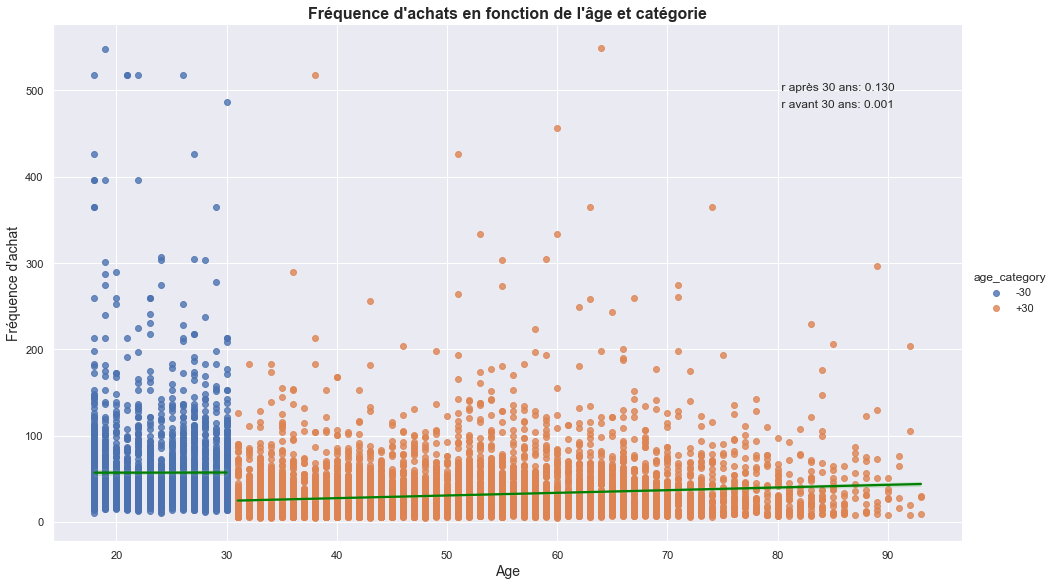

In [145]:
bins= [0,30,100]
labels = ['-30','+30']
fréquence['age_category'] = pd.cut(fréquence['age'], bins, labels=labels)
sns.lmplot(data=fréquence,x="age", y="fréquence", hue="age_category", 
           height=8, aspect=1.7, line_kws={"color":"green"}) 
plt.title("Fréquence d'achats en fonction de l'âge et catégorie",
          fontsize=16,fontweight='bold')
plt.ylabel("Fréquence d'achat",fontsize=14)
plt.xlabel ('Age', fontsize=14)
plt.text(80, 500, f" r après 30 ans: %.3f" % r3)
plt.text(80, 480, f" r avant 30 ans: %.3f" % r4);

### Est-ce qu'il y a un lien entre la taille du panier moyen et l'âge?

La taille du panier moyen est le nombre d'articles par session, soit le nombre d'achats moyen par session par client

In [146]:
#nombre d'achats par session par un client
panier=Fichier_particulier1.groupby(['client_id','age','session_id'])["session_id"].agg(['count'])
panier.head(6)

count
client_id age session_id       
c_1       67  s_105105        1
              s_114737        5
              s_120172        2
              s_134971        1
              s_136532        1
              s_139610        1

In [147]:
#nombre d'achats moyen par session par un client
panier_moyen=panier.groupby(["client_id","age"]).agg(["mean"])
panier_moyen.head(5) 

,,count
,,mean
client_id,age,
c_1,67,1.181818
c_10,66,1.705882
c_100,30,1.600000
c_1000,56,1.344086
c_1001,40,2.170213


In [148]:
#calcul moyenne par âge pour identifier les différents comportements
panier_moyen_age=panier_moyen.groupby(["age"]).mean().reset_index()
panier_moyen_age.head(5) 

,age,count
,,mean
0,18,1.819899
1,19,1.760903
2,20,1.777140
3,21,1.798059
4,22,1.915485


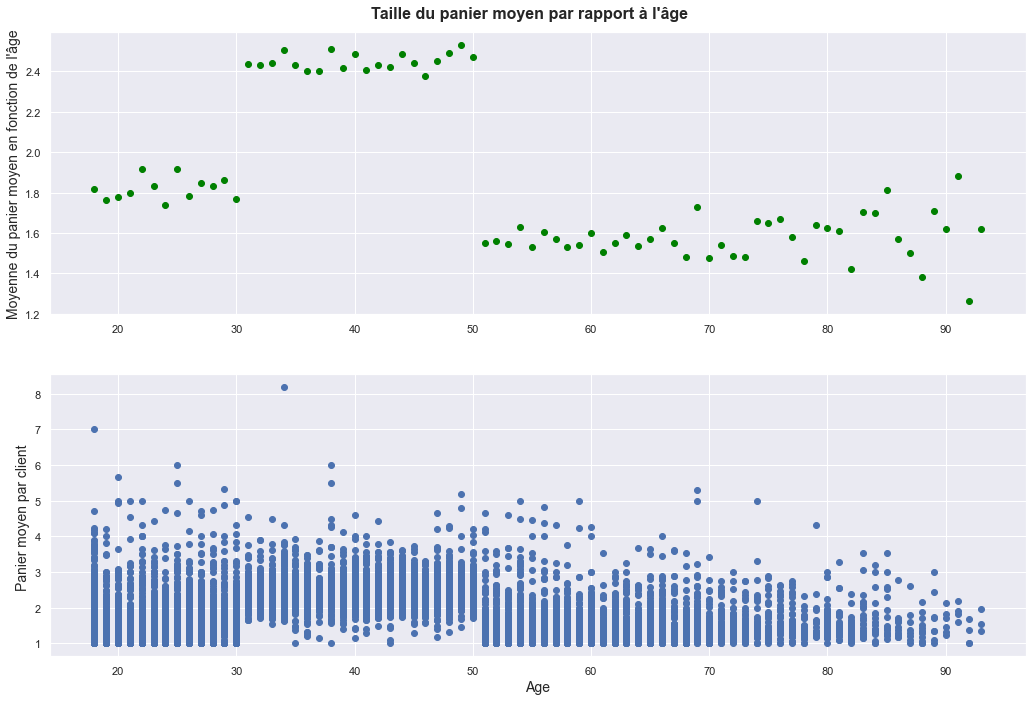

In [149]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 10)) #(nbre ligne, nbre colonne)

fig.tight_layout(pad=3) #donner un peu d'espace
ax1.scatter(x=panier_moyen_age["age"], y=panier_moyen_age["count"], color="green")
ax2.scatter(x=panier_moyen.reset_index()["age"], y=panier_moyen.reset_index()["count"])
ax2.set_xlabel('Age',fontsize=14)
ax1.set_ylabel("Moyenne du panier moyen en fonction de l'âge",fontsize=14)
ax2.set_ylabel("Panier moyen par client ",fontsize=14)

fig.suptitle("Taille du panier moyen par rapport à l'âge",fontsize=16,fontweight='bold');

On voit à première vue 3 catégories bien distinctes. Avant 30 ans, entre 30 et 50 ans, puis après 51 ans.
Nous allons faire notre test de corrélation à partir de ces 3 échantillons

#### Test de normalité 


- Test de Shapiro-Wilk

In [150]:
shapiro_test(panier_moyen)

pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté


- Test de kolmogorov-smirnov

In [151]:
stat, pvalue= stats.kstest(panier_moyen, 'norm')
print("pvalue: %.3f" % pvalue)

pvalue: 0.000


Nous obtenons les mêmes résultats

#### Test de corrélation 

- Test de Spearman- (Test de Pearson non paramétrique)


In [152]:
corr, p= st.spearmanr(panier_moyen.reset_index()['age'], panier_moyen.reset_index()['count'])
print("pvalue: %.3f" % p)
print("coefficient de correlation: %.3f" % corr)

pvalue: 0.000
coefficient de correlation: -0.207


On peut dire que nous avons bien une correlation négative faible entre l'age et la taille du panier. C'est à dire, plus l'âge est important, moins la taille du panier est importante

- Test de Kendall

In [153]:
tau, p_value = stats.kendalltau(panier_moyen.reset_index()['age'], panier_moyen.reset_index()['count'])
print("pvalue: %.3f" % p_value)
print("coefficient de correlation: %.3f" % tau)

pvalue: 0.000
coefficient de correlation: -0.131


Nous avons les mêmes résultats

#### Analyse de la corrélation

##### Groupe 1 - Avant 30 ans

In [154]:
panier=panier_moyen.reset_index()
avant_30_ans_=panier.loc[panier["age"] <= 30]

corr, p= st.spearmanr(avant_30_ans_['age'], avant_30_ans_['count'])
print("pvalue: %.3f" % p)
r5 = st.pearsonr(avant_30_ans_["age"],avant_30_ans_["count"])[0]
print("r: %.3f" % r5)
print("r\u00b2 :", r5*r5)

pvalue: 0.821
r: 0.006
r² : [3.171807544072344e-05]


##### Groupe  2 - Entre 30 et 50 ans

In [155]:
entre_30_et_50_ans=panier.loc[(panier["age"] >30) & (panier["age"] <=50)]

corr, p= st.spearmanr(entre_30_et_50_ans['age'], entre_30_et_50_ans['count'])
print("pvalue: %.3f" % p)
r6 = st.pearsonr(entre_30_et_50_ans["age"],entre_30_et_50_ans["count"])[0]
print("r: %.3f" % r6)
print("r\u00b2 :", r6*r6)

pvalue: 0.222
r: 0.019
r² : [0.0003471498264085371]


##### Groupe 3 - Après 50 ans

In [156]:
après_50_ans_=panier.loc[panier["age"] > 50]

corr, p= st.spearmanr(après_50_ans_['age'], après_50_ans_['count'])
print("pvalue: %.3f" % p)
r7 = st.pearsonr(après_50_ans_["age"],après_50_ans_["count"])[0]
print("r: %.3f" % r7)
print("r\u00b2 :", r7*r7)

pvalue: 0.078
r: 0.016
r² : [0.00024634834429874]


Nous avons vu qu'en général, grâce à l'effet de masse, l'âge a une faible influence sur le panier moyen. 

Toutefois, quand on fait une analyse de corrélation concernant les parties isolées, on retrouve un __pvalue >0.05__ et un __r proche de 0__, qui démontrent que les deux variables sont indépendantes.

##### <font color='blue'>Graphes</font>

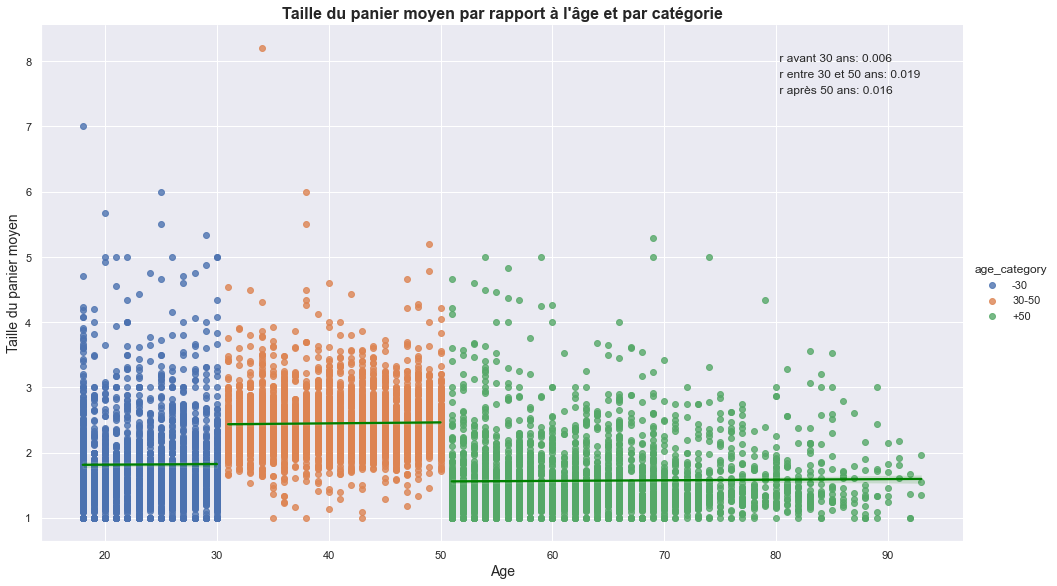

In [157]:
bins= [0,30,50,100]
labels = ['-30','30-50','+50']
panier['age_category'] = pd.cut(panier['age'], bins, labels=labels)
sns.lmplot(data=panier,x="age", y="count", hue="age_category", 
           height=8, aspect=1.7, line_kws={"color":"green"}) 
plt.title("Taille du panier moyen par rapport à l'âge et par catégorie",
          fontsize=16,fontweight='bold')
plt.ylabel("Taille du panier moyen",fontsize=14)
plt.xlabel ('Age', fontsize=14)
plt.text(80, 8, f" r avant 30 ans: %.3f" % r5)
plt.text(80, 7.75, f" r entre 30 et 50 ans: %.3f" % r6)
plt.text(80, 7.5, f" r après 50 ans: %.3f" % r7);

### Est-ce qu'il y a un lien entre les catégories des livres achetés et l'âge du client?

Ici, on est face à une variable quantitative et une autre qualitative catégorielle à 3 groupes. Ces 3 groupes sont indépendants. Donc nous allons effectuer les tests __ANOVA__ ou __kruskal wallis__ pour voir s'il y a une corrélation entre les 2 variables.

In [158]:
cat_age=Fichier_particulier.groupby(['age','categ'])["categ"].agg(['count'])
cat_age.head(6)

count
age  categ       
18.0 0       3418
     1       5719
     2       6012
19.0 0        909
     1       1678
     2       1784

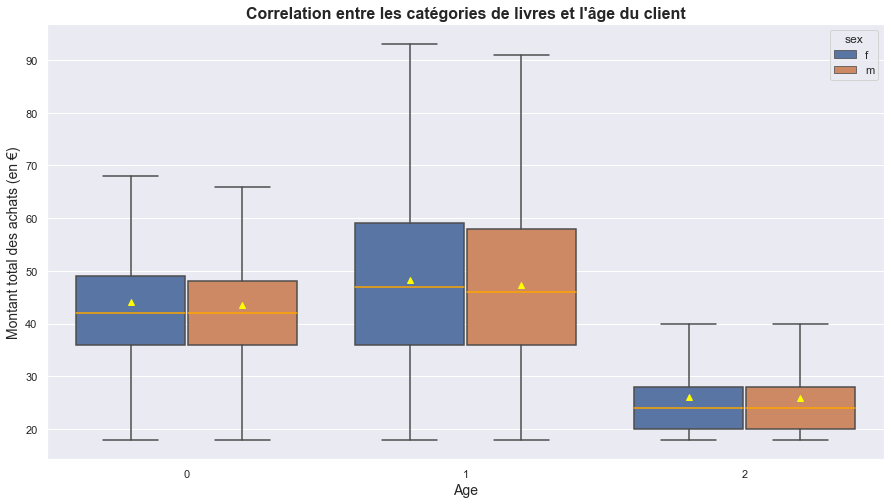

In [159]:

sns.boxplot(x= "categ", y="age", data=Fichier_particulier,
           showfliers = False, medianprops = {'color':"orange"},
            showmeans=True,
           meanprops = {'markeredgecolor':'yellow',
            'markerfacecolor':'yellow'},
           hue="sex") 
plt.title("Correlation entre les catégories de livres et l'âge du client",
         fontsize=16,fontweight='bold')
plt.ylabel("Montant total des achats (en €)",fontsize=14)
plt.xlabel ('Age', fontsize=14);

Sur ce graphique, on constate que l'âge a une influence sur la catégorie de livres. Par exemple, seuls les jeunes de moins de 40 ans sont intéressés par les livres de catégorie 2.

#### Test d'égalité des variances - Test de Levene

Nous allons d'abord tester l'une des premières conditions du test ANOVA, qui est le test d'égalité des variances

##### Poses d'hypothèses

Nous allons poser les hypothèses ci-dessous:

__H0__ :La moyenne ou variance des différents groupes sont égales

__H1__: Au moins l'une des moyennes des groupes est différente des autres

In [160]:
Fichier_particulier1=Fichier_final.loc[~Fichier_final.client_id.isin(client_pro)] #enlever les nan
stat, pvalue = stats.levene(Fichier_particulier1[Fichier_particulier1.categ=='0']["age"],
            Fichier_particulier1[Fichier_particulier1.categ=='1']["age"],
            Fichier_particulier1[Fichier_particulier1.categ=='2']["age"], 
             center='mean')
print("pvalue: %.3f" % pvalue)

pvalue: 0.000


La pvalue est inférieure à 0.05, donc nous pouvons rejeter l'hypothèse de l'égalité des variances. Nous ne pouvons donc pas utiliser le test __ANOVA__ pour connaitre la relation de correlation entre les 2 variables. 

##### Vérification si nos échantillons suivent une loi normale ou pas

In [161]:
group1= Fichier_particulier1[Fichier_particulier1.categ=='0']["age"]
group2= Fichier_particulier1[Fichier_particulier1.categ=='1']["age"]
group3= Fichier_particulier1[Fichier_particulier1.categ=='2']["age"]


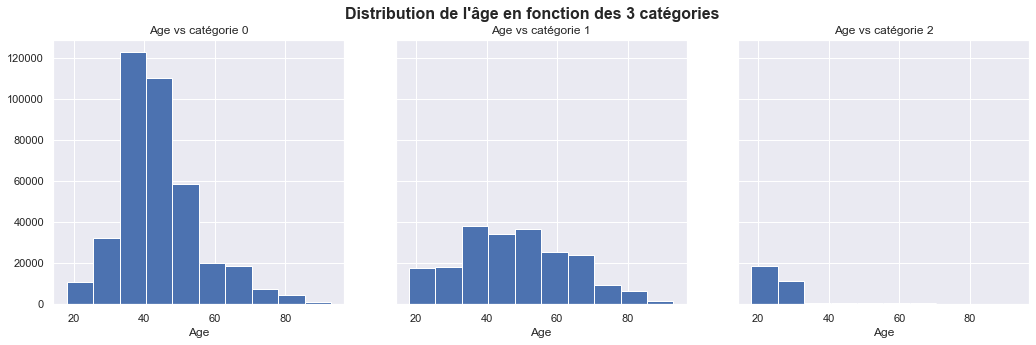

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5),  sharex=True, sharey=True) #(nbre ligne, nbre colonne)

fig.tight_layout(pad=3) #donner un peu d'espace

ax1.hist(group1)
ax2.hist(group2)
ax3.hist(group3)

ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')

fig.suptitle("Distribution de l'âge en fonction des 3 catégories", fontsize=16,fontweight='bold')
ax1.set_title("Age vs catégorie 0")
ax2.set_title("Age vs catégorie 1")
ax3.set_title("Age vs catégorie 2");

Graphiquement nous n'avons pas des courbes en cloche qui indique si nos échantillons sont normallement distribuées.
Nous allons passer un test de normalité

##### Test de normalité 

In [163]:
shapiro_test(group1)
shapiro_test(group2)
shapiro_test(group3)

pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté
pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté
pvalue: 0.0
Avec un seuil de confiance à 99%, les données ne suivent pas une loi normale. H0 est rejetté


Avec le résultat de ces différents tests, nous allons utiliser le test non paramétrique __Kruskal-Wallis__ pour tester la corrélation entre les catégories et l'âge

#### Test de Kruskal-Wallis - (ANOVA non paramétrique)

##### Poses d'hypothèses

__H0__: Les variables ne sont pas corrélées.

__H1__ : Les variables sont corrélées.

In [164]:
stat, pvalue = stats.kruskal(group1, group2, group3)
print("pvalue: %.3f" % pvalue)

pvalue: 0.000


On a une pvalue < 0.05, donc on rejette H0. Il y a une corrélation entre les catégories de livres achetés par âge.
En d'autres termes, l'âge influence la catégorie.

#### Analyse de la force de corrélation entre les variables

In [165]:
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

In [166]:
Fichier_cat_age=cat_age.reset_index()
eta_squared(Fichier_cat_age["categ"],Fichier_cat_age["age"])

0.0

Le rapport de corrélation __ETA__ nous indique que la correlation est négligeable.


In [167]:
import pingouin as pg

In [168]:
pg.anova(dv='age', between='categ', data=Fichier_cat_age, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,categ,0.0,2,0.000000,0.0,1.0,0.0
1,Within,109725.0,225,487.666667,NaN,NaN,NaN


Nous retouvons toujours le même résultat .